# **Final Project Customer Churn Bank Prediction**
# **Data Goddesses**

> 👧🏻 Member of Data Goddesses :

* Aleisya Zahari Salam
* Alicia Gofina
* Devi Nur Aisyah
* Deva Khofifah Jauharotun Naqiyyah
* Fiorent Arie Hernanti
* Najmi Laily Fahira
* Tisa Safina Alchalista

In [ ]:
!gdown 1-WwaLsp_aQComZvKx0mOMZ22Nfex7p5g

Downloading...
From: https://drive.google.com/uc?id=1-WwaLsp_aQComZvKx0mOMZ22Nfex7p5g
To: /content/Churn_Modelling.csv
100% 685k/685k [00:00<00:00, 132MB/s]


# **Import Library**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import math
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# **Dataset Information**

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

Dataset ini berisi data nasabah sebuah bank dan beberapa feature yang dapat menggambarkan value dari nasabah tersebut.  

**Feature Desctiption:**
* RowNumber : Nomor baris dalam dataset
* CustomerId : ID unik untuk setiap nasabah
* Surname : Nama nasabah
* CreditScore : Skor kredit nasabah
* Geography: Lokasi geografis nasabah
* Gender: Jenis kelamin nasabah (male of female)
* Age: Usia nasabah
* Tenure: Jangka waktu pelanggan telah menjadi nasabah bank
* Balance: Saldo rekening nasabah
* NumOfProducts: Jumlah produk yang dimiliki oleh nasabah
* HasCrCard: Indikator apakah pelanggan memiliki kartu kredit (0: Tidak, 1: Ya)
* IsActiveMember: Indikator apakah pelanggan aktif sebagai anggota (0: Tidak, 1: Ya)
* EstimatedSalary: Estimasi gaji nasabah
* Exited: Variabel target, indikator apakah pelanggan churn atau tidak (0: Tidak, 1: Ya)


# **STAGE 1 : EDA (Exploratory Data Analysis)**

In [ ]:
# Melihat isi data teratas
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (10000, 14)
Number of rows : 10000
Number of columns : 14


In [ ]:
# Mendapatkan info dari setiap feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations :**
- Dataset memiliki 14 colums dan 10000 rows data
- Tipe data masing-masing kolom sudah tepat, dan terdapat 3 jenis data yaitu : int64, object, float64
- Antara columns dan number of rows sudah sesuai jadi tidak terjadi missing values
- Antara nama kolom dan isi masing-masingnya sudah sesuai

In [ ]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Observations:**
- Hasil output yang kita sertakan menunjukkan bahwa tidak ada kolom yang memiliki nilai kosong dalam dataset.
- Semua kolom memiliki jumlah entri yang sama dengan jumlah total baris data, ini berarti **tidak terdapat missing value**

Dengan demikian, kita tidak perlu melakukan handling seperti imputasi atau drop untuk mangatasi nilai kosong dalam dataset ini.

## Stastistik deskriptif data

In [ ]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [ ]:
df.describe(include='object')

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

**Observations :**

Berdasarkan data tersebut, dapat diperhatikan bahwa :
- Terdapat data dengan jarak mean dan median yang cukup kecil. Dapat ditemukan pada kolom `CreditScore`, `Tenure`, `Age`, dan `EstimatedSalary`
- Terdapat data dengan nilai median lebih besar dari mean. Dapat ditemukan pada kolom `IsActiveMember`, `hascrcard`, dan `balance`, pada kolom ini memiliki distribusi yang cenderung  negative skew.
- Terdapat data dengan nilai median yang lebih kecil dari mean. Dapat ditemukan pada kolom `NumOfProducts`, pada kolom ini memiliki distribusi yang cenderung positive skew.
- Untuk kolom `RowNumber` dan `CustomerID` tidak akan dilakukan analisis lebih lanjut. Sebab kolom `RowNumber` merupakan index dari data dan `CostumerID` merupakan data identifier masing-masing pelanggan.
- Pada data dengan tipe kategorik, Geography dan Gender sudah memiliki nilai unique yang sesuai, sedangkan Surname memiliki nilai unique yang sangat banyak sehingga tidak diperlukan untuk pembuatan model machine learning.


## Univariate Analysis

In [ ]:
# Memisahkan kolom numerik dan kategorik
kolom_numerik = ['CreditScore', 'Age', 'Tenure','Balance', 'EstimatedSalary']
kolom_kategorik = ['Geography','Gender', 'HasCrCard', 'NumOfProducts', 'IsActiveMember', 'Exited']
print(kolom_numerik)
print(kolom_kategorik)
print(len(kolom_numerik))
print(len(kolom_kategorik))

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
['Geography', 'Gender', 'HasCrCard', 'NumOfProducts', 'IsActiveMember', 'Exited']
5
6


### Analisis Numerik

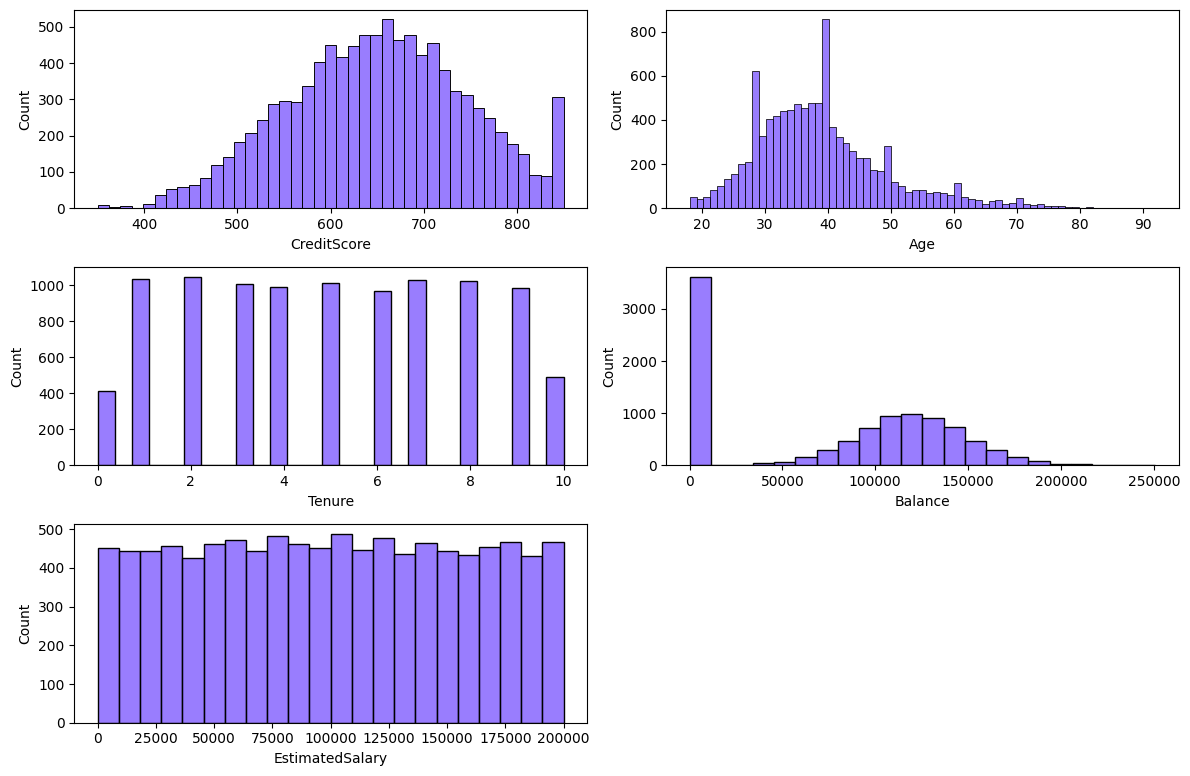

In [ ]:
features = kolom_numerik
n=4
plt.rcParams['figure.figsize'] = (12, 10)

for i in range(0, len(features)):

    plt.subplot(n, math.ceil(len(kolom_numerik)/n), i+1)
    sns.histplot(x=df[features[i]], color='#7752FE')
    plt.xlabel(features[i])
    plt.tight_layout()


plt.show()

**Histplot Analysis**
- Kolom `Credit Score` memiliki distribusi negative skew mendekati normal. mayoritas customer memiliki jumlah credit score di rentang 600 sampai 700, dan ditemukan outliers pada kolom ini dengan nilai 400 kebawah.
- Kolom `Age` memiliki distribusi positive skew. mayoritas customer berusia di rentang 30-45
- Kolom `Tenure` memiliki distribusi yang cukup merata
- Kolom `Balance` cenderung memiliki distribusi yang normal, namun pada kolom ini terdapat satu nilai yang mendominasi yaitu 0
- Kolom `EstimatedSalary` memiliki distribusi yang cukup merata

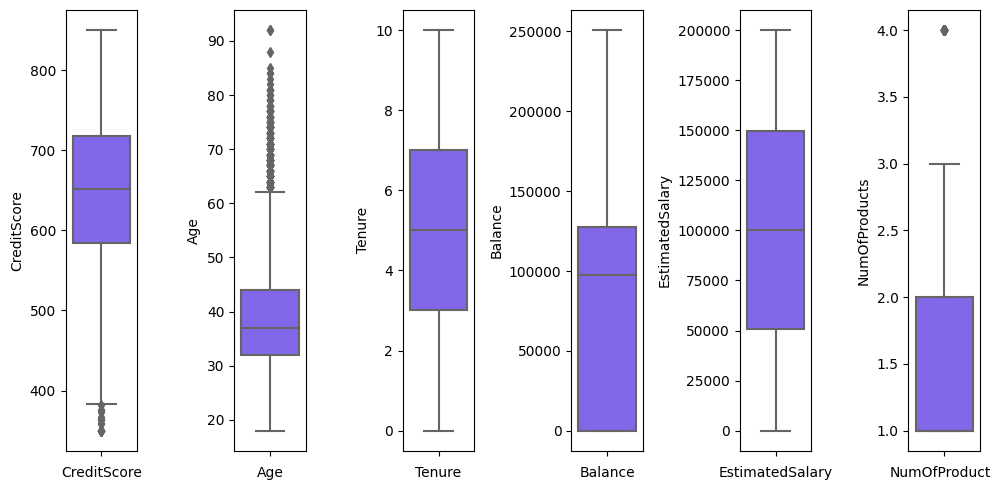

In [ ]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']
plt.rcParams['figure.figsize'] = (10, 5)

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.boxplot(y=df[feature], color='#7752FE')
    plt.xlabel(feature)
    plt.tight_layout()

plt.show()


**Boxplot Analysis**

- Kolom `CreditScore` ditemukan data outlier yang sebagian besar terletak di bawah batas bawah IQR.
- Kolom `Age` ditemukan data outlier yang sebagian besar terletak di atas batas atas IQR.
- Kolom `Tenure` tidak ditemukan adanya data outlier.
- Kolom `Balance` tidak ditemukan adanya data outlier.
- Kolom `EstinatedSalary` tidak ditemukan adanya data outlier.
- Kolom `NumOfProducts` ditemukan data outlier yang sebagian besar terletak di atas batas atas IQR.

**Tindak lanjut**
- Untuk data yang mengandung outlier akan difilter dengan menggunakan metode IQR.

### Analisis Kategorik

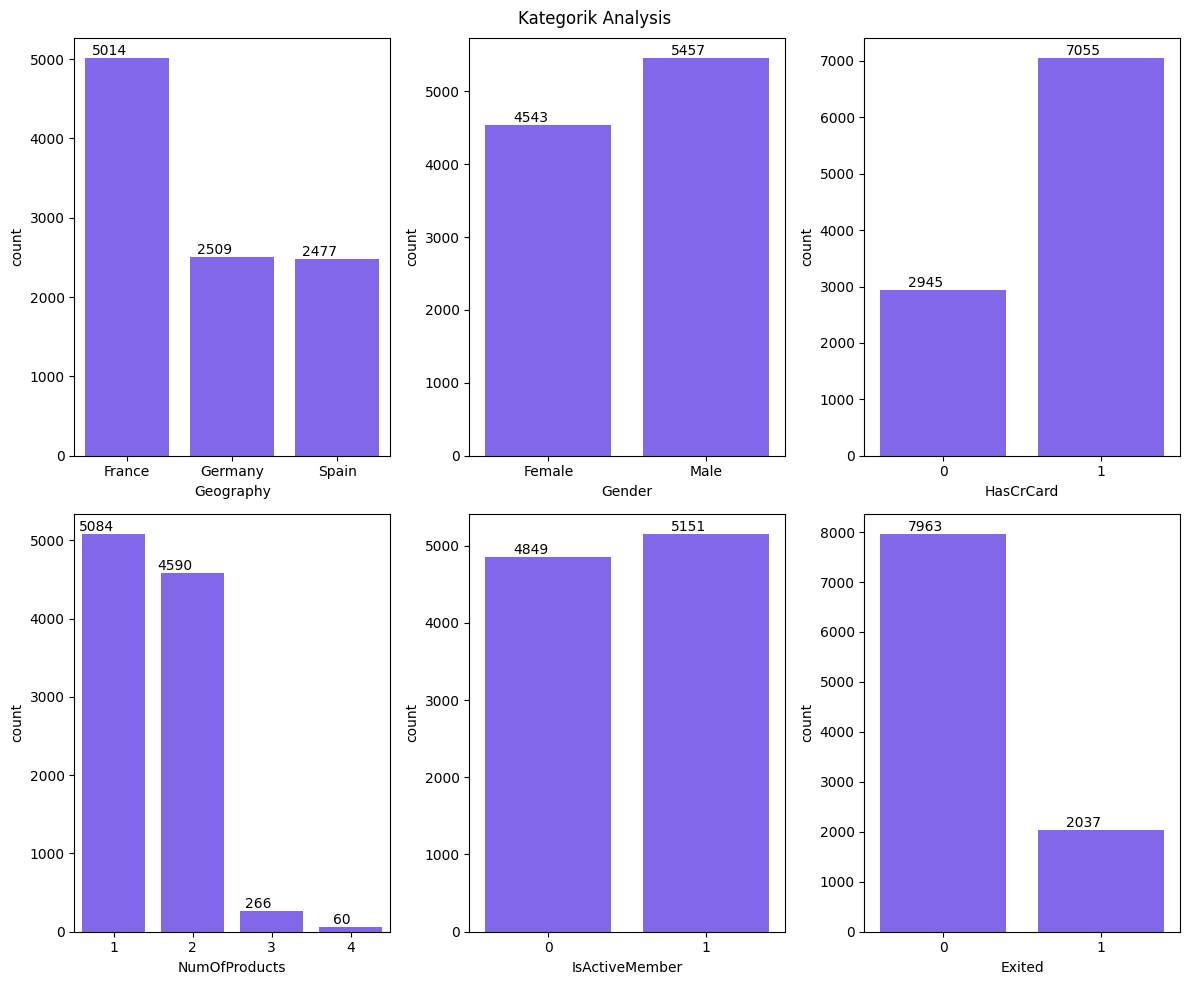

In [ ]:
features = kolom_kategorik
n=2
plt.rcParams['figure.figsize'] = (12, 10)
fig = plt.figure()
fig.suptitle('Kategorik Analysis')

for i in range(0, len(features)):
    plt.subplot(n, math.ceil(len(kolom_kategorik)/n), i+1)
    value_counts = df[kolom_kategorik[i]].value_counts().sort_index()#sort = False)

    sns.countplot(x=(df[features[i]]).sort_values(ascending = True), color='#7752FE')


    for x, count in enumerate(value_counts):
        plt.text(x, count, str(count), ha='right', va='bottom')

    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()

**Barplot Analysis**

- Dalam kolom `Geography` terdapat nilai yang paling umum yaitu 'France'
- Dalam kolom `Gender` frekuensi tertinggi terdapat pada nilai male dan tidak terlalu terlihat perbandingan jumlah yang tinggi diantara nilai.
- Dalam kolom `HasCrCard` didapatkan bahwa mayoritas kostumer memiliki Credit Card
- Dalam kolom `NumOfProducts`,  dua nilai yang paling sering muncul adalah '1' dan '2'.
- Dalam kolom `IsActiveMember` tidak terlihat ada data dengan perbandingan yang cukup tinggi.
- Dalam kolom `Exited`terdapat nilai '0' yang paling umum, yaitu pelanggan yang tidak churn.


**Tindak Lanjut**
- Berdasarkan visualisasi tersebut, ditemukan beberapa data yang imbalance. Oleh karena itu perlu dianalisis lebih lanjut untuk mengetahui sejauh mana ketidakseimbangan data tersebut.

**Catatan Tambahan**
- Kolom ``RowNumber`` termasuk index kolom dan ``CustomerID`` merupakan identifer unik masing-masing pelanggan, sehingga keduanya tidak dimasukkan kedalam tipe data kategorik.


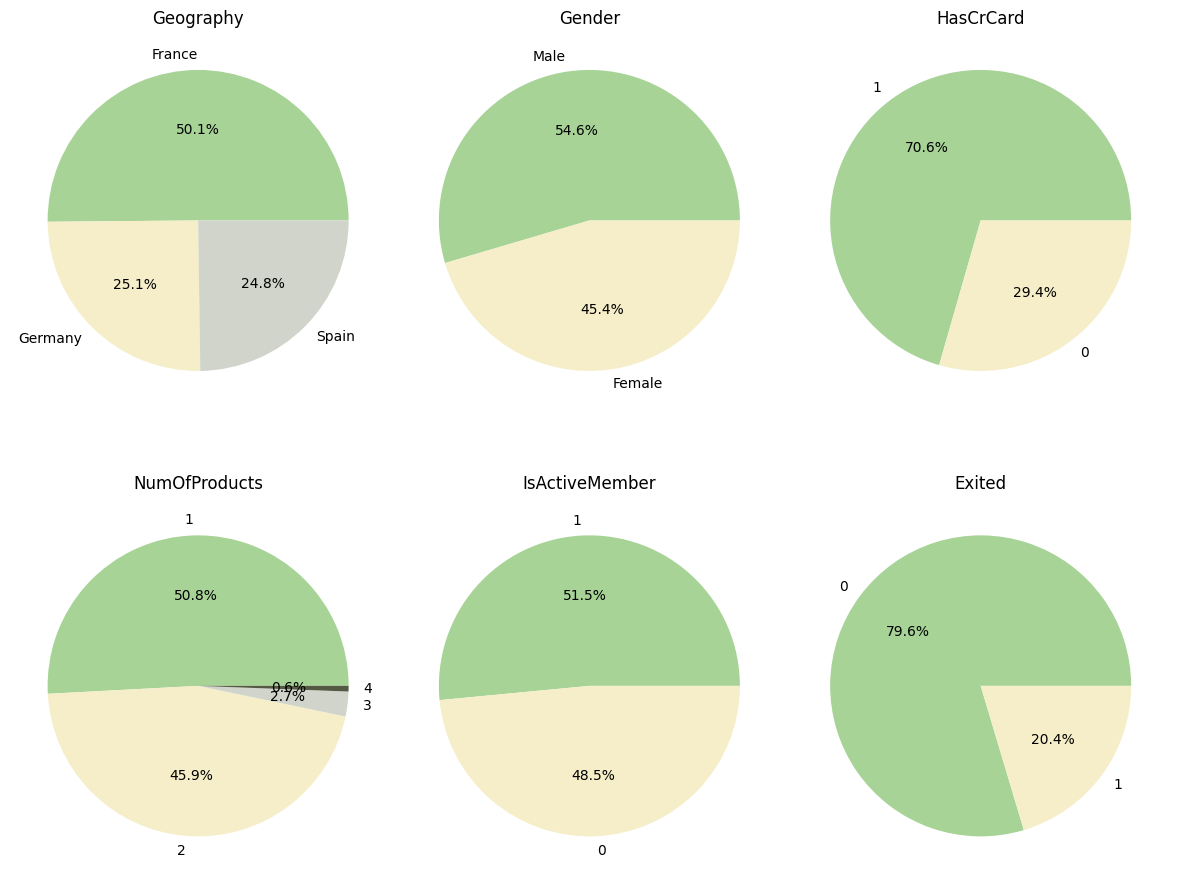

In [ ]:
kolom_kategorik1 = ['Geography', 'Gender', 'HasCrCard', 'NumOfProducts', 'IsActiveMember', 'Exited']

n = 2
plt.rcParams['figure.figsize'] = (12, 10)

for i in range(0, len(kolom_kategorik1)):
    plt.subplot(n, math.ceil(len(kolom_kategorik1) / n), i + 1)

    # Calculate the value counts
    value_counts = df[kolom_kategorik1[i]].value_counts()

    # Create a pie chart with percentages
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['#A7D397', '#F5EEC8', '#D0D4CA', '#555843'])

    # Add a title
    plt.title(f'{kolom_kategorik1[i]}')

plt.tight_layout()
plt.show()


**Imbalanced Data Analysis**

source : [Google developer machine learning 'Imbalanced Data'](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data#:~:text=A%20classification%20data%20set%20with,smaller%20proportion%20are%20minority%20classes.)

    Degree of imbalance	    Proportion of Minority Class
    --------------------------------------------------------
    Mild	                   20-40% of the data set
    Moderate	               1-20% of the data set
    Extreme	                <1% of the data set
**Hasil observasi :**
- Dalam kolom `Geography` terdapat ketidakseimbangan data, kolom Germany dan spain termasuk kedalam kateogri mild dengan rasio masing-masing 25.1% dan 24.8%
- Dalam kolom `Gender` tidak terdapat ketidakseimbangan data.
- Dalam kolom `HasCrCard` terdapat ketidakseimbangan data pada nilai '0', termasuk kedalam kateogri mild dengan rasio 29.4%
- Dalam kolom `NumOfProducts` terdapat ketidakseimbangan data yang masuk kedalam kategori extreme untuk kolom nilai '4' sebanyak 0.6%, dan kolim nilai '3' termasuk moderate dengan rasio 2.7
%
- Dalam kolom `IsActiveMember`tidak terdapat ketidakseimbangan data.
- Dalam kolom `Exited` terdapat ketidakseimbangan data. kolom dengan nilai '1' memiliki rasio 20.4% yang termasuk kedalam kategori mild.


### Pengecekan Outlier

In [ ]:
print(f'Jumlah baris: {len(df)}')
Kolom_numerik1 = ['CreditScore', 'Age', 'Tenure','Balance', 'EstimatedSalary', 'NumOfProducts']

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []


filtered_entries = np.array([True] * len(df))
for col in Kolom_numerik1:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    #mulai filter outlier
    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":Kolom_numerik1,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 10000
Outlier All Data : 432
Not Outlier All Data : 9568



Column Name  is Outlier   Lower Limit   Upper Limit  Outlier  \
0      CreditScore        True     383.00000     919.00000       15   
1              Age        True      14.00000      62.00000      359   
2           Tenure       False      -3.00000      13.00000        0   
3          Balance       False -191466.36000  319110.60000        0   
4  EstimatedSalary       False  -96577.09625  296967.45375        0   
5    NumOfProducts        True      -0.50000       3.50000       60   

   No Outlier  
0        9985  
1        9641  
2       10000  
3       10000  
4       10000  
5        9940

**Hasil observasi :**

Pada data tipe numerik terdapat outlier pada kolom `CreditScore`, `Age`, dan `NumOfProducts`.

- Pada kolom `CreditScore` terdapat 15 data outlier, dengan nilai terjauh terdapat di bawah IQR yaitu 350000
- Pada kolom `Age` terdapat 359 data outlier, dengan nilai terjauh terdapat di atas IQR yaitu 92.
- Pada kolom `NumOfProducts` terdapat 60 data outlier, dengan nilai terjauh terdapat di atas IQR yaitu 4

## Multivariate Analysis

In [ ]:
# Memisahkan feature berdasarkan tipe data untuk proses multivariate analysis
cat = ['Surname', 'Geography', 'Gender']
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

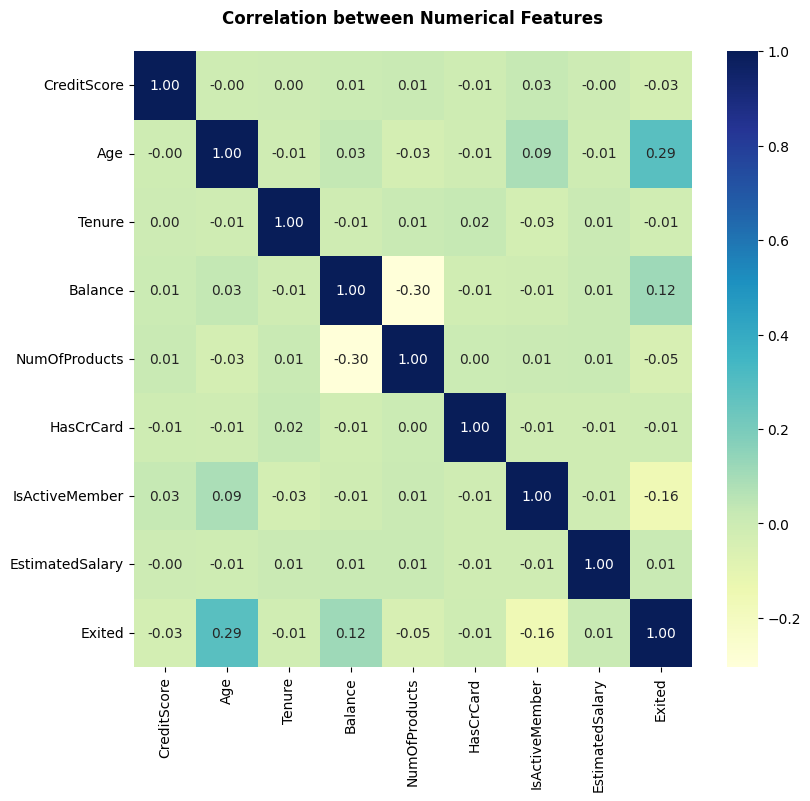

In [ ]:
# Melihat korelasi antar feature dengan heatmap
plt.figure(figsize=(9, 8))
sns.heatmap(df[nums].corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Correlation between Numerical Features', fontweight='bold', pad=20)
plt.show()

Berdasarkan heatmap tersebut, kita dapat simpulkan :
1. Korelasi feature ke target (Exited)<br>
Beberapa feature yang kemungkinan besar relevan dan perlu dipertahankan :
- **Age** memiliki korelasi **positif 0.29**  
Dapat dikatakan bahwa semakin tua pelanggan, semakin tinggi kecenderungan mereka akan churn.
- **IsActiveMember** memiliki korelasi **negatif -0.16**  
Dapat dikatakan bahwa semakin tinggi balance yang dimiliki nasabah, semakin tinggi juga kecenderungan mereka untuk churn.
- **Balance** memiliki korelasi **positif 0.12**  
Dapat dikatakan bahwa pelanggan yang tidak aktif memiliki kemungkinan keluar yang lebih tinggi (hubungan berbalik)
- **NumOfProducts** memiliki korelasi **negatif -0.05**  
Dapat dikatakan bahwa pelanggan dengan lebih banyak produk (NumOfProduct) cenderung memiliki kemungkinan churn yang lebih rendah. <br><br>

2. Korelasi antar feature
- **Age** dan **IsActiveMember** memiliki korelasi **positif 0.09** <br>
Dapat dikatakan bahwa nasabah yang lebih tua, sedikit lebih cenderung menjadi anggota yang aktif.

- **Balance** dan **NumOfProduct** memiliki korelasi **negatif -0.30** <br>
Dapat dikatakan bahwa nasabah yang dengan balance atau saldo rendah cenderung memiliki lebih banyak produk. <br><br>

Karena korelasi antar kolom pada dataset tersebut cenderung memiliki nilai yang rendah, yaitu berada dalam range 0.00 hingga 0.29. Kami memutuskan untuk membuat nilai threshold pada angka 0.05 sehingga feature-feature dengan nilai korelasi >=0.05 kemungkinan akan kami pertahankan.

In [ ]:
# Membuat tabel nilai korelasi berdarkan value corr terbesar
corr = df.corrwith(df["Exited"])
corr = corr.reset_index(name='corr value')
corr["Corr type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr.sort_values('corr value', ascending=False, ignore_index=True)

index  corr value Corr type
0            Exited    1.000000   Positif
1               Age    0.285323   Positif
2    IsActiveMember    0.156128   Negatif
3           Balance    0.118533   Positif
4     NumOfProducts    0.047820   Negatif
5       CreditScore    0.027094   Negatif
6         RowNumber    0.016571   Negatif
7            Tenure    0.014001   Negatif
8   EstimatedSalary    0.012097   Positif
9         HasCrCard    0.007138   Negatif
10       CustomerId    0.006248   Negatif

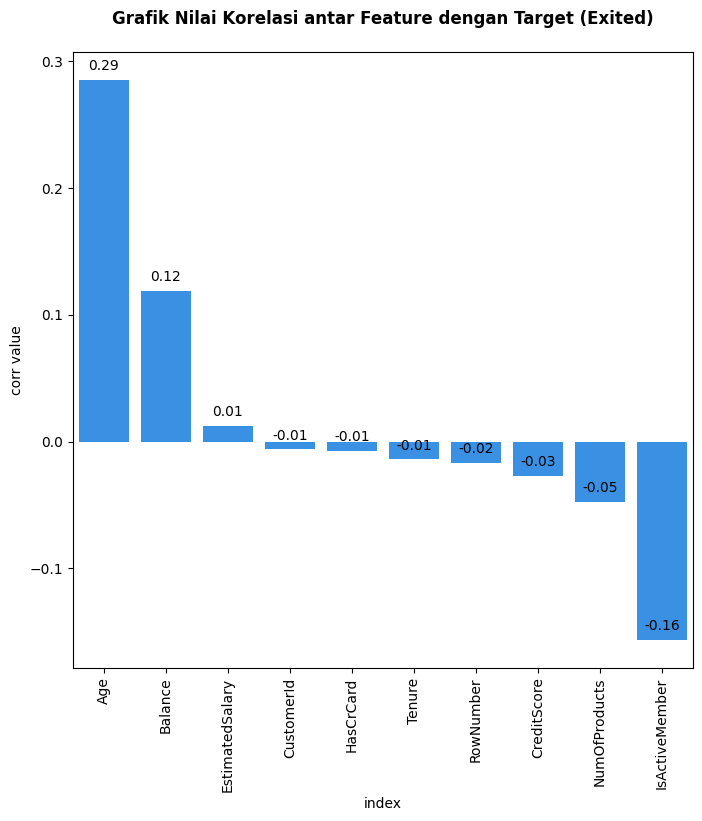

In [ ]:
# Membuat grafik nilai korelasi
corr = df.corrwith(df["Exited"])
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(8, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 10),
        fontsize=10,
        textcoords = 'offset points')
plt.title("Grafik Nilai Korelasi antar Feature dengan Target (Exited)", fontweight='bold', pad=20)
plt.xticks(rotation=90)
plt.show()

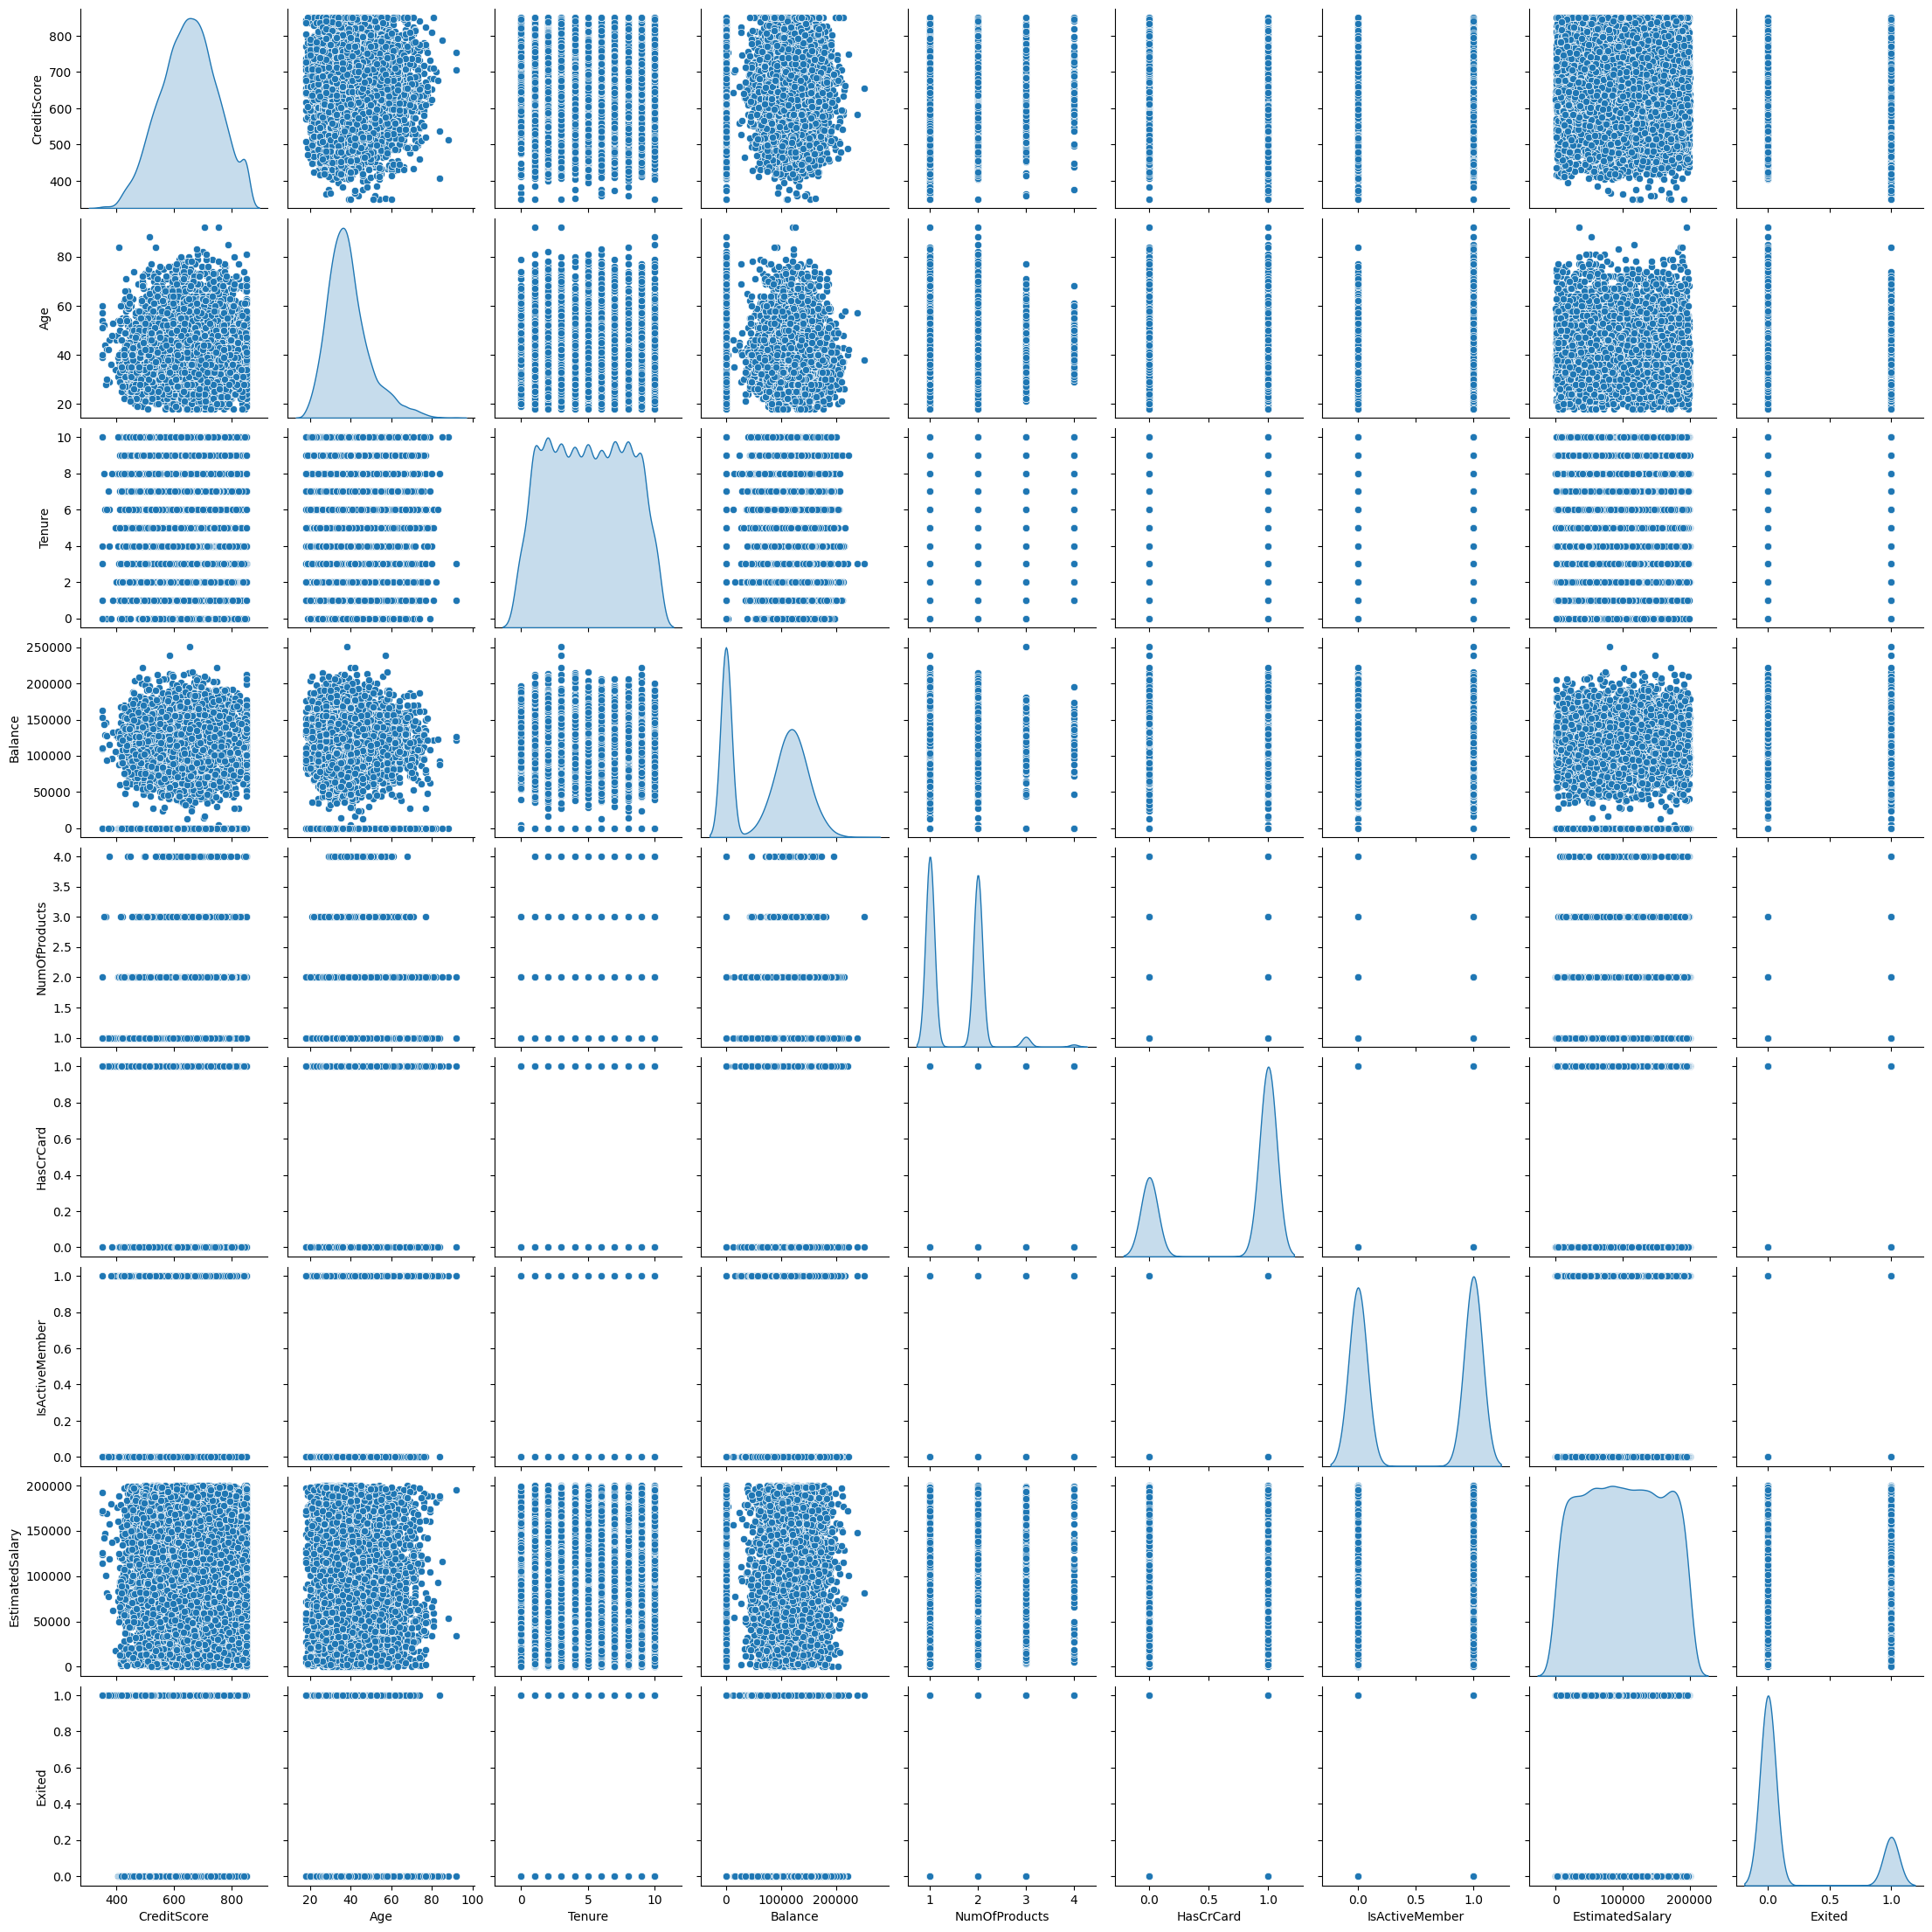

In [ ]:
# Pair plot untuk fitur numerik
sns.pairplot(df[nums], diag_kind='kde')
plt.show()

**Observation** : Belum ada hal menarik atau insight yang kami dapatkan

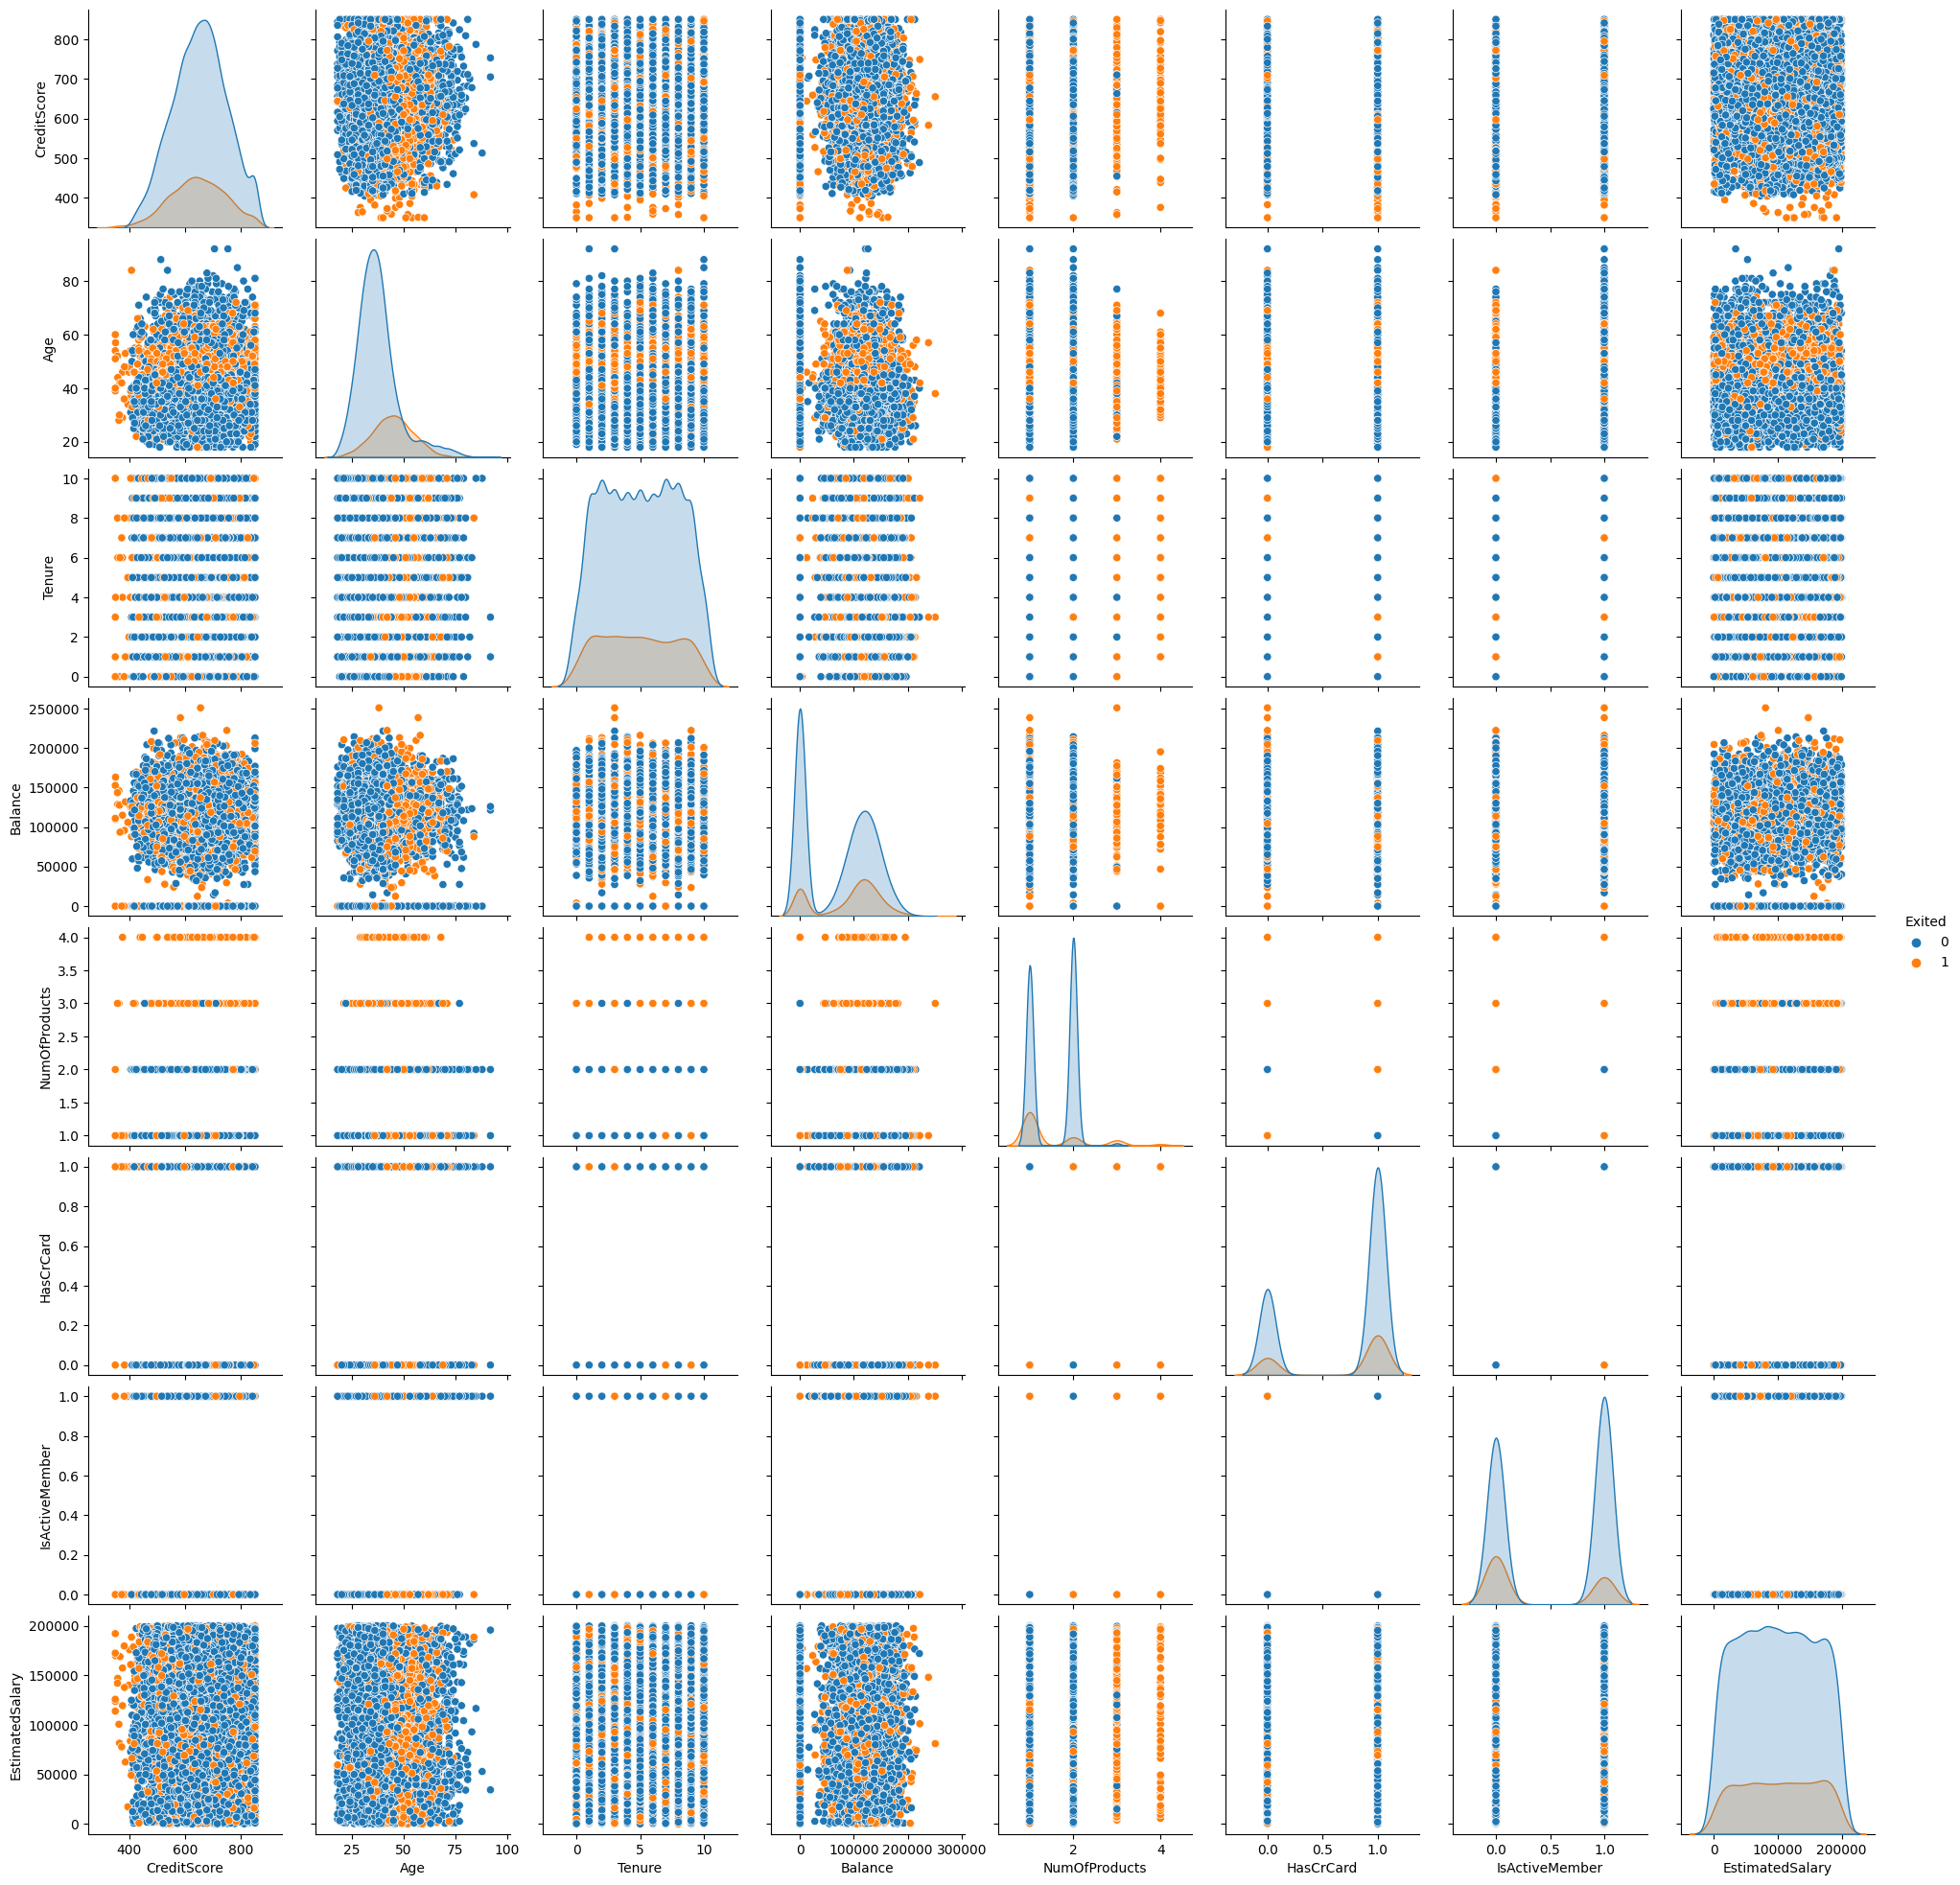

In [ ]:
sns.pairplot(df[nums], hue='Exited',diag_kind='kde')

**Observation** : Ditemukan sedikit kecenderungan bahwa nasabah dengan CreditScore dibawah 400 dan EstimatedSalary sedang ke tinggi cenderung melakukan churn. Meskipun terdapat pola ini, kedua feature tersebut tidak cukup dikatakan berkorelasi dengan target, sehingga feature ini tidak relevan dan tidak perlu dipertahankan.

In [ ]:
# categorical dan numerical baru
cat_baru = ['Geography', 'Gender',]
num_baru = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','IsActiveMember', 'HasCrCard']

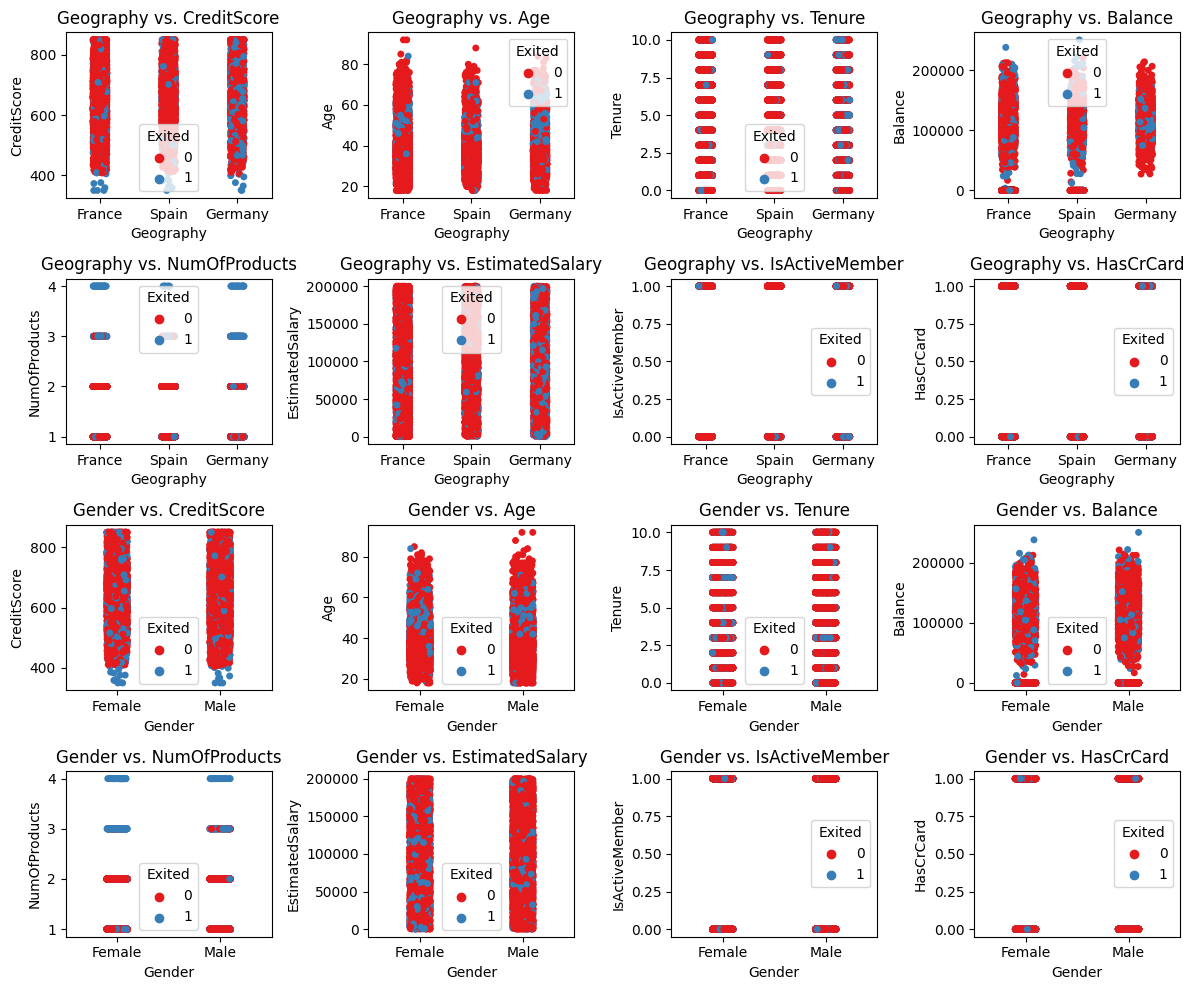

In [ ]:
# Mengatur ukuran gambar
plt.figure(figsize=(12, 10))

# Membuat category plots
for i, cat_feature in enumerate(cat_baru):
    for j, num_feature in enumerate(num_baru):
        plt.subplot(4, 4, i * len(num_baru) + j + 1)
        sns.stripplot(x=cat_feature, y=num_feature, hue='Exited', data=df, palette='Set1', jitter=True)
        plt.title(f'{cat_feature} vs. {num_feature}')
        plt.xlabel(cat_feature)
        plt.ylabel(num_feature)

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

**Observation** : Belum begitu terlihat suatu pola signifikan

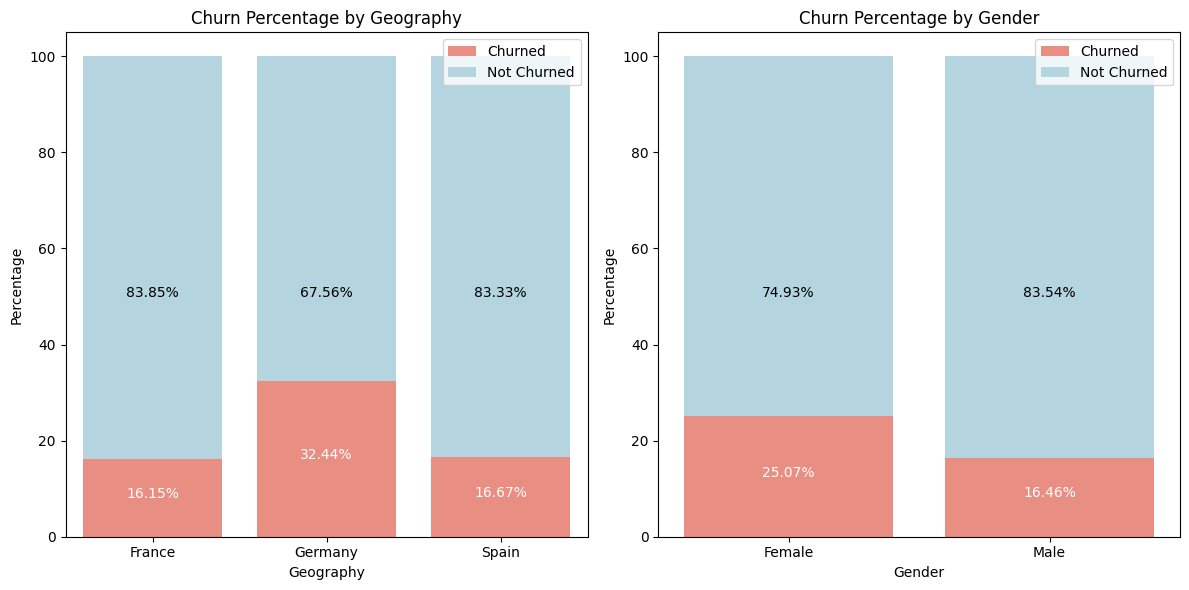

In [ ]:
# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))

# Membuat stacked bar
for i, category in enumerate(cat_baru):
    churn_by_category = df.groupby([category, 'Exited']).size().unstack().reset_index()
    churn_by_category['Total'] = churn_by_category[0] + churn_by_category[1]
    churn_by_category[0] = (churn_by_category[0] / churn_by_category['Total']) * 100
    churn_by_category[1] = (churn_by_category[1] / churn_by_category['Total']) * 100

    plt.subplot(1, 2, i + 1)
    sns.barplot(x=category, y=1, data=churn_by_category, color='salmon', label='Churned')
    sns.barplot(x=category, y=0, data=churn_by_category, color='lightblue', bottom=churn_by_category[1], label='Not Churned')
    plt.title(f'Churn Percentage by {category}')
    plt.xlabel(category)
    plt.ylabel('Percentage')
    plt.legend()

    for j in range(len(churn_by_category)):
        plt.text(j, churn_by_category[1][j] / 2, f'{churn_by_category[1][j]:.2f}%', ha='center', color='white')
        plt.text(j, (churn_by_category[1][j] + churn_by_category[0][j]) / 2, f'{churn_by_category[0][j]:.2f}%', ha='center', color='black')

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

Korelasi antara fitur kategori dan label `Exited`:
   - Pada `Geography`, terdapat perbedaan yang signifikan antara negara Germany, dengan France dan Spain yaitu dalam proporsi nasabah yang churn.
   - Sementara itu, `Gender` tidak menunjukkan perbedaan yang signifikan dalam visualisasi diatas, yang berarti fitur ini mungkin tidak begitu relevan dalam memprediksi nasabah yang churn. Oleh karena itu, diperlukan analisis lebih lanjut.

Berdasarkan hasil keseluruhan analisis Multivariate tersebut, dapat diambil kesimpulan bahwa feature yang paling relevan dan harus dipertahankan adalah sebagai berikut :

* **Age**
* **IsActiveMember**
* **Balance**
* **NumOfProduct**
* **Geography**

## Bussines Insight

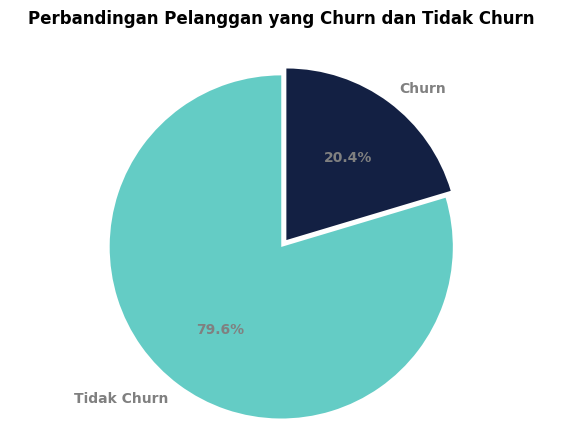

In [ ]:
# Membuat grafik pie perbandingan churn
churn_rate = df['Exited'].value_counts()
explode = (0.05, 0)
text_props = {'color': 'gray', 'weight': 'bold'}

plt.figure(figsize=(7, 5))
plt.pie(churn_rate, labels=['Tidak Churn', 'Churn'], autopct='%1.1f%%', startangle=90, explode = explode, colors = [ '#64CCC5', '#132043'], textprops=text_props)
plt.axis('equal')
plt.title('Perbandingan Pelanggan yang Churn dan Tidak Churn', fontweight='bold', pad=20)
plt.show()

Grafik ini tersebut menunjukkan bahwa **tingkat churn** pada Bank CBA **sebesar 20.4%**. Melampaui indikator tingkat churn yang baik pada umumnya, yaitu 5-7%.  

**Rekomendasi** : bisnis perlu meningkatkan strategi retensi pelanggan seperti contohnya peningkatan dalam layanan pelanggan, memberikan insentif kepada pelanggan yang mungkin berisiko keluar, atau meninjau ulang kebijakan atau produk yang mungkin menjadi faktor pengambilan keputusan pelanggan untuk meninggalkan perusahaan.

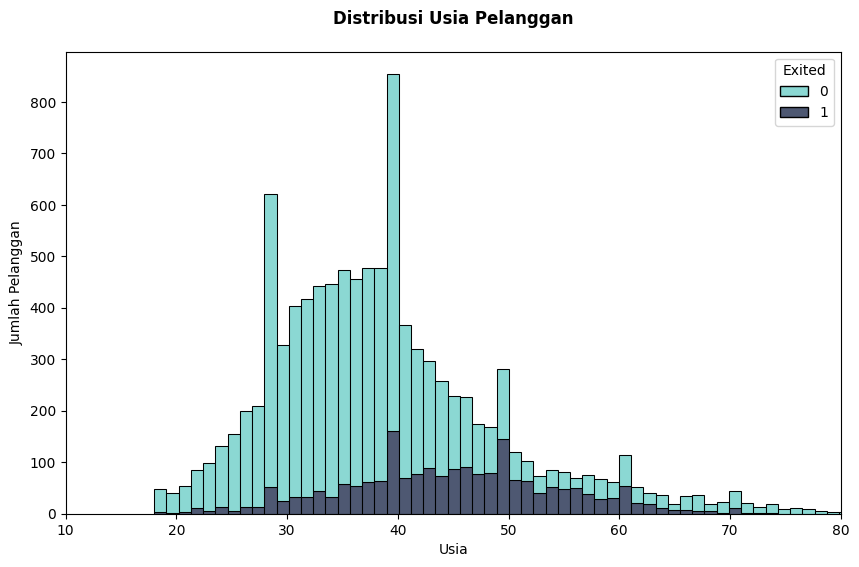

In [ ]:
# Membuat grafik distribusi usia pelanggan
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', palette=[ '#64CCC5', '#132043'], multiple = 'stack')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.xlim(10, 80)
plt.title('Distribusi Usia Pelanggan', fontweight='bold', pad=20)
plt.show()

Terdapat kecenderungan bahwa yang tua lebih banyak churn. dimana customer **churn paling tinggi** terjadi di rentang **usia 40-60 tahun**. Ini mengindikasi bahwa **usia dapat menjadi faktor** dalam penentuan customer churn atau tidak.  
**Rekomendasi :** Bank perlu meninjau dan menyesuaikan strategi retensi mereka di antara kelompok usia yang berbeda, terutama kelompok usia 40-60 tahun. Seperti memberikan penawaran yang dapat membuat customer dalam kelompok usia ini lebih puas atau terikat dengan layanan bank.

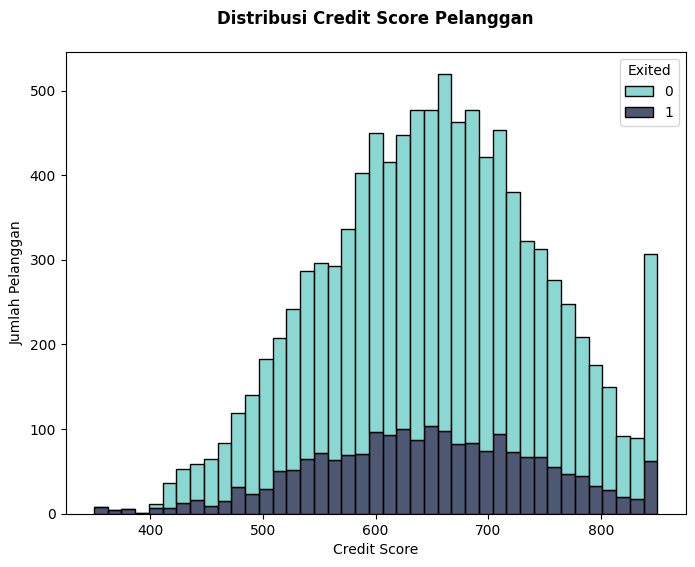

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='CreditScore', hue='Exited', palette=[ '#64CCC5', '#132043'], multiple = 'stack')
plt.xlabel('Credit Score')
plt.ylabel('Jumlah Pelanggan')
plt.title('Distribusi Credit Score Pelanggan', fontweight='bold', pad=20)
plt.show()

Terdapat kecenderungan churn yang tinggi pada nasabah dengan **CreditScore** rentang 600 - 700.

**Rekomendasi :** Mengembangkan penawaran khusus atau paket layanan yang ditujukan untuk memenuhi kebutuhan dan ekspektasi pelanggan dalam rentang CreditScore tersebut.

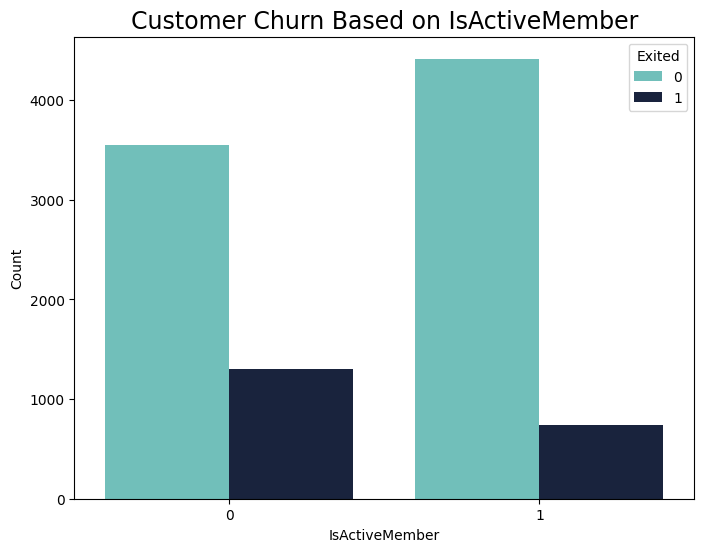

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IsActiveMember', hue='Exited', palette=[ '#64CCC5', '#132043'])
plt.title('Customer Churn Based on IsActiveMember', fontsize=17)
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.show()

**Churn lebih tinggi** pada **customer** yang **tidak aktif**.  

Berdasarkan insight tersebut, tidak mengherankan jika churn yang tinggi pada customer yang tidak aktif. Namun, cukup mengkhawatirkan mengingat proporsi keseluruhan nasabah yang tidak aktif cukup tinggi.   
**Rekomendasi :** Bank perlu membuat suatu program khusus yang dapat mendorong customer ini menjadi lebih aktif, seperti memberikan penawaran khusus atau meningkatkan komunikasi dengan customer.

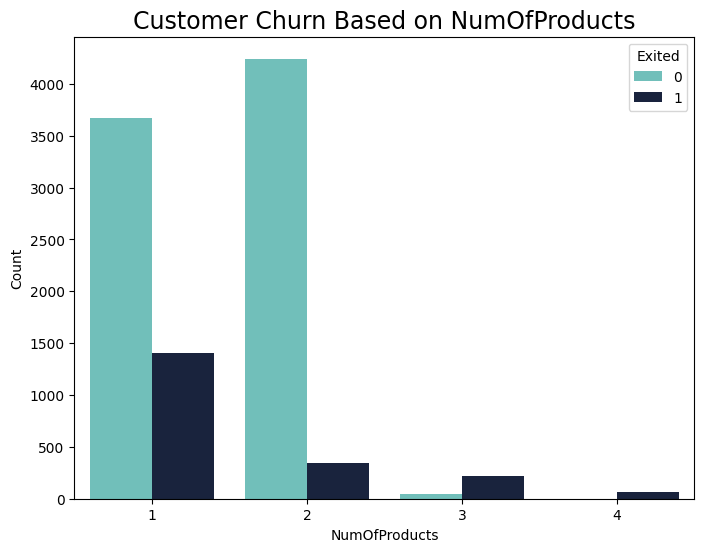

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette=[ '#64CCC5', '#132043'])
plt.title('Customer Churn Based on NumOfProducts', fontsize=17)
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.show()

**Churn lebih tinggi** pada customer yang hanya **membeli satu produk**.

**Rekomendasi :** Memberikan penawaran seperti bundling produk untuk mendorong customer menggunakan atau membeli lebih dari satu produk atau memberikan informasi tentang produk lainnya yang tersedia.


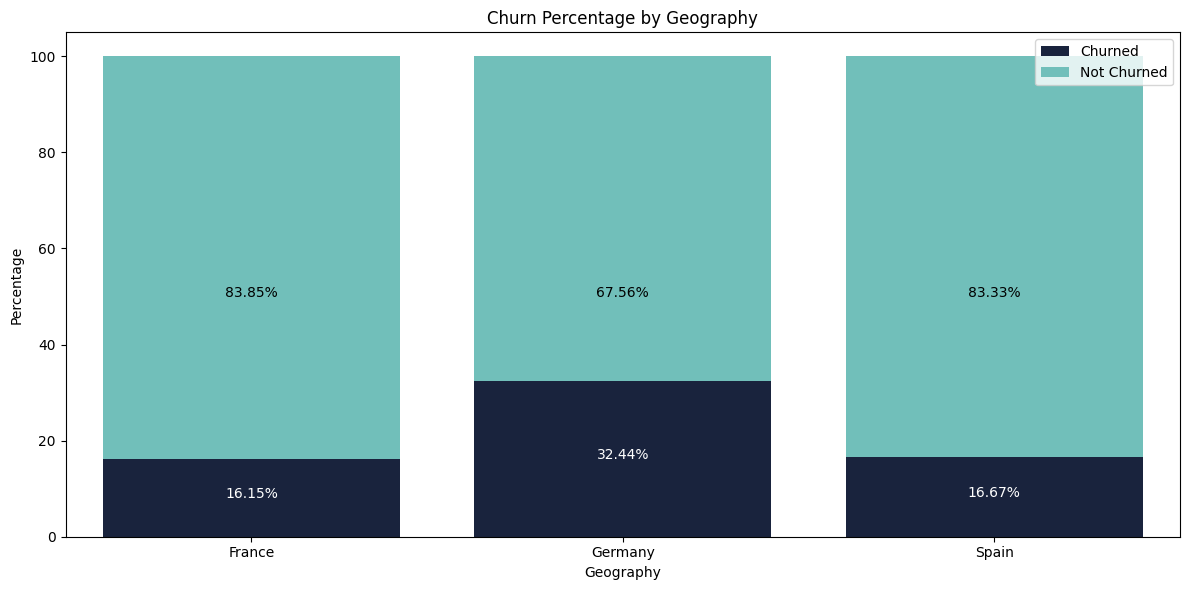

In [ ]:
# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))
churn_by_category = df.groupby(['Geography', 'Exited']).size().unstack().reset_index()
churn_by_category['Total'] = churn_by_category[0] + churn_by_category[1]
churn_by_category[0] = (churn_by_category[0] / churn_by_category['Total']) * 100
churn_by_category[1] = (churn_by_category[1] / churn_by_category['Total']) * 100

sns.barplot(x='Geography', y=1, data=churn_by_category, color='#132043', label='Churned')
sns.barplot(x='Geography', y=0, data=churn_by_category, color='#64CCC5', bottom=churn_by_category[1], label='Not Churned')
plt.title('Churn Percentage by Geography')
plt.xlabel('Geography')
plt.ylabel('Percentage')
plt.legend()

for j in range(len(churn_by_category)):
    plt.text(j, churn_by_category[1][j] / 2, f'{churn_by_category[1][j]:.2f}%', ha='center', color='white')
    plt.text(j, (churn_by_category[1][j] + churn_by_category[0][j]) / 2, f'{churn_by_category[0][j]:.2f}%', ha='center', color='black')

# Menyesuaikan layout subplot
plt.tight_layout()

# Menampilkan plot
plt.show()



**Customer Germany** memiliki **tingkat churn yang lebih tinggi** dibanding france dan spain.   

**Rekomendasi :** Bank perlu melakukan analisis lebih lanjut mengenai penyebabnya dan kemudian dapat menyesuaikan strategi retensi yang sesuai dengan preferensi customer Germany.

# **STAGE 2 : Data Pre-processing**

## Handling Missing Values

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Tidak perlu handle missing values** karena semua value sudah terisi atau tidak ada yang kosong.

## Handle Duplicated Data

In [ ]:
df.duplicated().sum()

0

Berdasarkan hasil pengecekan, tidak ditemui baris data yang memiliki duplikat. Sehingga **tidak perlu dilakukan handle duplicated data.**

## Handle Outlier

_Sebelumnya pada stage EDA..._  
<br>

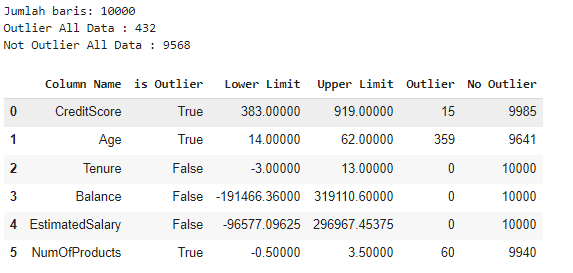

**Menghapus Outlier berdasarkan IQR**

In [ ]:
# Kolom yang akan di-handle outlier
columns_to_handle_outlier = ['CreditScore', 'Age']

# Iterasi melalui setiap kolom untuk menangani outlier
for column in columns_to_handle_outlier:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan atas outlier
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)

    # Menghapus outlier dari DataFrame
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [ ]:
print('Jumlah baris setelah handle outlier :', df.shape[0])

Jumlah baris setelah handle outlier : 9626


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9626 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9626 non-null   int64  
 1   CustomerId       9626 non-null   int64  
 2   Surname          9626 non-null   object 
 3   CreditScore      9626 non-null   int64  
 4   Geography        9626 non-null   object 
 5   Gender           9626 non-null   object 
 6   Age              9626 non-null   int64  
 7   Tenure           9626 non-null   int64  
 8   Balance          9626 non-null   float64
 9   NumOfProducts    9626 non-null   int64  
 10  HasCrCard        9626 non-null   int64  
 11  IsActiveMember   9626 non-null   int64  
 12  EstimatedSalary  9626 non-null   float64
 13  Exited           9626 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Keterangan:**  
Data yang akan dilakukan handling outliers adalah data tipe numerik kontinu. Dalam dataset ini kolom yang dilakukan handle outlier yaitu `CreditScore` dan `Age` dengan menggunakan metode IQR untuk melakukan handling outlier, hal ini karena IQR cukup robust atau tidak dipengaruhi oleh nilai ekstrem dan tidak memerlukan asumsi tertentu mengenai distribusi data. Dapat dilihat bahwa data yang telah dihandle outlier berdasarkan IQR menjadi 9626 baris.

## Feature Encoding

In [ ]:
# OHE pada feature Geography dan Gender
df = pd.get_dummies(df, columns=['Geography', 'Gender'], prefix=['Geo', 'Is'])
df.head()

RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Geo_France  Geo_Germany  Geo_Spain  Is_Female  Is_Male  
0           1            0          0          1        0  
1           0            0          1          1        0  
2           1            0          0          1        0  
3           1            0          0          1        0  
4           0            0          1          1        0

Secara umum, encoding categorical data diperlukan agar model machine learning dapat memahami data tersebut. Model machine learning biasanya hanya dapat memahami data numerik. Dengan melakukan encoding, data kategorikal dapat diubah menjadi data numerik sehingga dapat diproses oleh model machine learning.

Dalam kasus ini, *one-hot encoding* cocok digunakan untuk kolom `Geography`dan `Gender` karena memiliki lebih dari dua kategori pada geography dan bukan tipe data ordinal pada gender.

**One Hot Encoding Gender**  

One Hot Encoding dilakukan pada Kolom `Gender` karena merupakan data kategorikal bukan ordinal, dalam hal ini tidak ada nilai yang lebih tinggi atau lebih rendah antara female dan male. One hot encoding mengubah setiap kategori menjadi kolom yang bernilai 0 atau 1. Kolom baru yang bernilai 1 menunjukkan bahwa data tersebut termasuk ke dalam kategori tersebut.

**One Hot Encoding Geography**

Kolom `Geography` di encode karena merupakan data kategorikal yang memiliki lebih dari dua kategori, yaitu France, Germany, dan Spain. One-hot encoding mengubah setiap kategori menjadi kolom baru yang bernilai 0 atau 1. Kolom baru yang bernilai 1 menunjukkan bahwa data tersebut termasuk dalam kategori tersebut.

## Pemisahan Feature dan Target

In [ ]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geo_France', 'Geo_Germany',
       'Geo_Spain', 'Is_Female', 'Is_Male'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9626 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9626 non-null   int64  
 1   Age              9626 non-null   int64  
 2   Tenure           9626 non-null   int64  
 3   Balance          9626 non-null   float64
 4   NumOfProducts    9626 non-null   int64  
 5   HasCrCard        9626 non-null   int64  
 6   IsActiveMember   9626 non-null   int64  
 7   EstimatedSalary  9626 non-null   float64
 8   Exited           9626 non-null   int64  
 9   Geo_France       9626 non-null   uint8  
 10  Geo_Germany      9626 non-null   uint8  
 11  Geo_Spain        9626 non-null   uint8  
 12  Is_Female        9626 non-null   uint8  
 13  Is_Male          9626 non-null   uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 799.0 KB


## Handle Class Imbalance

In [ ]:
smote = SMOTE(random_state=0)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print("Original Class Distribution:")
print(y.value_counts())

print("\nClass Distribution After Resampling:")
print(pd.Series(y_resampled).value_counts())

Original Class Distribution:
0    7677
1    1949
Name: Exited, dtype: int64

Class Distribution After Resampling:
1    7677
0    7677
Name: Exited, dtype: int64


## Feature Extraction

In [ ]:
percentile_25e = df['EstimatedSalary'].quantile(0.25)
percentile_75e = df['EstimatedSalary'].quantile(0.75)

df['Salary_Category'] = df['EstimatedSalary'].apply(lambda x: 'low' if x <= percentile_25e else ('mid' if percentile_25e < x <= percentile_75e else 'high'))

percentile_25t = df['Tenure'].quantile(0.25)
percentile_75t = df['Tenure'].quantile(0.75)

df['Tenure_Category'] = df['Tenure'].apply(lambda x: 'low' if x <= percentile_25t else ('mid' if percentile_25t < x <= percentile_75t else 'high'))

Membuat feature baru dari feature yang sudah ada :
1. `Salary_Category` : feature ini membagi estimated salary menjadi beberapa kategori yang berfungsi untuk menganalisis korelasi dengan churn.
2. `Tenure_Category` : feature ini membagi tenure menjadi beberapa kategori yang berfungsi untuk analisis korelasi dengan churn.

## Feature Selection

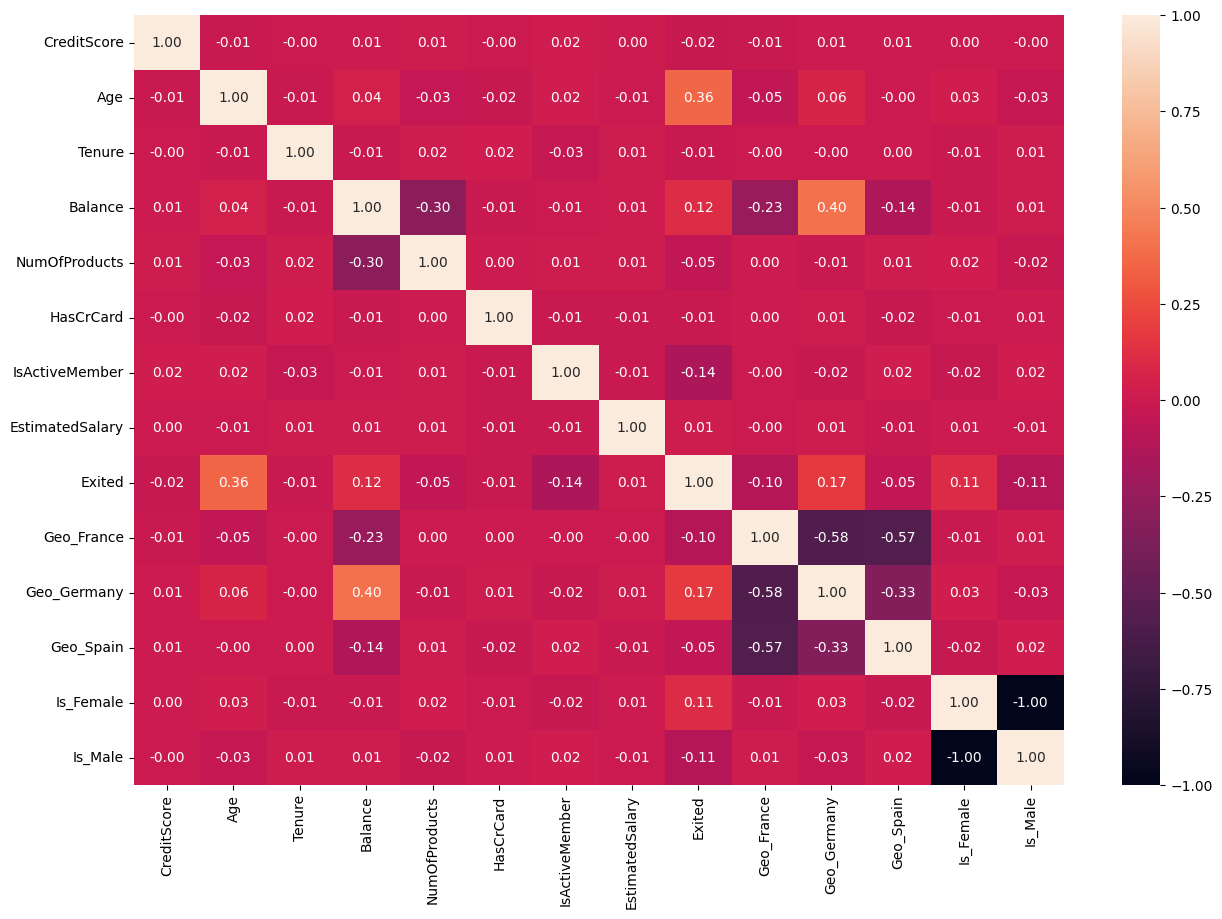

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
categorical = ['Is_Female','Is_Male', 'Geo_Germany', 'Geo_Spain', 'Geo_France', 'IsActiveMember', 'HasCrCard','Salary_Category','Tenure_Category']

In [ ]:
from scipy.stats import chi2_contingency

chi2_array, p_array = [], []
for column in categorical:

    crosstab = pd.crosstab(df[column], df['Exited'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

Variable  Chi-square       p-value
2      Geo_Germany  288.032718  1.334179e-64
5   IsActiveMember  197.296810  8.123591e-45
0        Is_Female  109.185095  1.478175e-25
1          Is_Male  109.185095  1.478175e-25
4       Geo_France  102.557298  4.190698e-24
3        Geo_Spain   28.120386  1.139987e-07
7  Salary_Category    3.095103  2.127682e-01
8  Tenure_Category    2.430056  2.967016e-01
6        HasCrCard    0.648381  4.206922e-01

**Pertimbangan lainnya berdasarkan EDA yang telah dilakukan :**

Kolom yang tidak dihilangkan :
- `Age`
- `IsActiveMember`
- `Balance`
- `NumOfProducts`
- `Geography`
- `CreditScore`

Berdasarkan EDA yang telah dilakukan kolom-kolom ini terlihat bahwa masing-masing nilai mempengaruhi kostumer churn, untuk itu akan dimasukkan sebagai fitur dalam model machine learning.

Analisis lebih lanjut :     
- `EstimatedSalary`
- `Tenure`
- `HasCrCard`  

Dari uji chi - square yang digunakan untuk menentukan independensi pada setiap variabel terhadap variabel target atau variabel kategorikal lainnya, terlihat bahwa feature berikut **tidak ada hubungan yang signifikan** antara feature dan variabel target (gagal menolak H0):
- `Salary_Category`
- `Tenure_Category`
- `HasCrCard`




Berdasarkan dari EDA dan uji chi-square yang telah dilakukan, berikut adalah feature yang **tidak akan digunakan** dalam machine learning :

- `RowNumber`, hal ini karena kolom tersebut merupakan index kolom dan tidak akan memberikan informasi yang berguna pada machine learning.
- `CustomerID`, kolom ini berisikan identifier unik dari masing-masing pelanggan dan biasanya hanya digunakan untuk referensi atau identifikasi. Oleh karena itu, kolom ini akan dibuang dan dibukti kan hasil EDA korelasi kolom ini dengan target yaitu 0.006248.
- `Surname`, sama halnya dengan `CustomerID` kolom ini lebih baik tidak digunakan karena hanya sebagai informasi dan tidak memiliki info prediktif hanya identifikasi unik.
- `EstimatedSalary` dan `Tenure`, berdarsarkan EDA sebelumnya terlihat bahwa kolom ini kurang terlihat dalam memberikan insight apakah kostumer churn atau tidak. Oleh karena itu dilakukan uji chi - square dimana kolom keduanya akan dibagi menjadi 3 kelompok (low(<25%), mid(>25% dan <75%), dan high (>75%)) Hasil uji didapatkan bahwa korelasi antara keduanya tidak signifikan.
- `HasCrCard`, berdasarkan uji chi-square yang telah dilakukan terlihat bahwa tidak terdapat hubungan yang siginifikan terhapat variabel target.

Sehingga, **feature yang akan dimasukkan ke dalam pemodelan** adalah:
- `Age`
- `IsActiveMember`
- `Balance`
- `NumOfProducts`
- `CreditScore`
- `Is_Male`
- `Is_Female`
- `Geo_Germany`
- `Geo_Spain`
- `Geo_France`

In [ ]:
# Melakukan drop kolom yang sudah tidak digunakan setelah feature selection
X_resampled = X_resampled.drop(['HasCrCard', 'EstimatedSalary', 'Tenure'], axis=1)

In [ ]:
X_resampled.columns

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember',
       'Geo_France', 'Geo_Germany', 'Geo_Spain', 'Is_Female', 'Is_Male'],
      dtype='object')

## Split Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

## Feature Transformation

In [ ]:
scaller = StandardScaler()

x_train = scaller.fit_transform(x_train)
x_test = scaller.transform(x_test)

In [ ]:
print("Mean setelah standardisasi :")
print(x_train.mean())

print("\nDeviasi Standar setelah standardisasi :")
print(x_train.std())

Mean setelah standardisasi :
-4.0088424316677475e-17

Deviasi Standar setelah standardisasi :
1.0


# **STAGE 3 : Modeling**

## Model Algoritma

Berdasarkan referensi yang disediakan oleh Scikit-Learn dan sumber-sumber lainnya, kami akan membandingkan enam jenis model klasifikasi yang berbeda. Keputusan untuk mengikutsertakan model-model ini dalam uji coba kami didasarkan pada pertimbangan berikut:

1. Linear SVC dan K-Nearest Neighbors Classifier cocok digunakan untuk dataset dengan ukuran sampel kurang dari 100 ribu. Kedua model ini efisien untuk dataset yang relatif kecil.

2. Decision Tree dipilih ketika kecepatan pemrosesan diperlukan dan kami ingin memahami secara rinci bagaimana model tersebut bekerja dari awal hingga akhir. Demikian pula, Logistic Regression dipilih karena kemampuannya untuk memberikan interpretasi yang jelas dan cocok untuk model klasifikasi dengan variabel dependen biner (dua kategori, dalam hal ini churn atau tidak churn)

3. Random Forest dan Gradient Boosting Classifier digunakan ketika prioritas kami adalah akurasi. Kedua model ini dikenal memiliki tingkat akurasi yang tinggi dibandingkan dengan beberapa model lainnya.

4. Terlepas dari alasan-alasan di atas, kami juga ingin menjelajahi model-model lain yang tidak dijelaskan oleh Rakamin Academy. Tujuan kami adalah untuk memahami perbedaan dan dampak dari masing-masing model ini.

In [ ]:
# fungsi untuk metrics evalution

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("\nPrecision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("\nRecall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("\nF1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

def roc_auc_eval(model):
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)

    print("\nroc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

### LinearSVC

In [ ]:
svc = LinearSVC()
svc.fit(x_train, y_train)
calibrated_svc = CalibratedClassifierCV(svc, method='sigmoid', cv='prefit')
calibrated_svc.fit(x_train, y_train)

CalibratedClassifierCV(cv='prefit', estimator=LinearSVC())

In [ ]:
eval_classification(svc)

svc_probs = calibrated_svc.predict_proba(x_test)[:, 1]
svc_probs_train = calibrated_svc.predict_proba(x_train)[:, 1]
print("\nroc_auc (test-proba): %.2f" % roc_auc_score(y_test, svc_probs))
print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, svc_probs_train))

Accuracy (Test Set): 0.84
Accuracy (Train set): 0.84

Precision (Test Set): 0.89
Precision (Train Set): 0.89

Recall (Test Set): 0.78
Recall (Train Set): 0.78

F1-Score (Test Set): 0.83
F1-Score (Train Set): 0.83

roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92


### KNN (K-Nearest Neighbors)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
eval_classification(knn)
roc_auc_eval(knn)

Accuracy (Test Set): 0.86
Accuracy (Train set): 0.91

Precision (Test Set): 0.87
Precision (Train Set): 0.92

Recall (Test Set): 0.86
Recall (Train Set): 0.89

F1-Score (Test Set): 0.87
F1-Score (Train Set): 0.90

roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.97


### Logistic Regression

In [ ]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [ ]:
eval_classification(logit)
roc_auc_eval(logit)

Accuracy (Test Set): 0.84
Accuracy (Train set): 0.84

Precision (Test Set): 0.88
Precision (Train Set): 0.89

Recall (Test Set): 0.79
Recall (Train Set): 0.78

F1-Score (Test Set): 0.83
F1-Score (Train Set): 0.83

roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92


### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
eval_classification(dt)
roc_auc_eval(dt)

Accuracy (Test Set): 0.83
Accuracy (Train set): 1.00

Precision (Test Set): 0.82
Precision (Train Set): 1.00

Recall (Test Set): 0.86
Recall (Train Set): 1.00

F1-Score (Test Set): 0.84
F1-Score (Train Set): 1.00

roc_auc (test-proba): 0.83
roc_auc (train-proba): 1.00


### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
eval_classification(rf)
roc_auc_eval(rf)

Accuracy (Test Set): 0.88
Accuracy (Train set): 1.00

Precision (Test Set): 0.89
Precision (Train Set): 1.00

Recall (Test Set): 0.88
Recall (Train Set): 1.00

F1-Score (Test Set): 0.88
F1-Score (Train Set): 1.00

roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00


### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
eval_classification(gbc)
roc_auc_eval(gbc)

Accuracy (Test Set): 0.88
Accuracy (Train set): 0.88

Precision (Test Set): 0.90
Precision (Train Set): 0.91

Recall (Test Set): 0.86
Recall (Train Set): 0.85

F1-Score (Test Set): 0.88
F1-Score (Train Set): 0.88

roc_auc (test-proba): 0.95
roc_auc (train-proba): 0.95


Dalam kasus memprediksi churn nasabah bank, hal yang perlu diperhatikan adalah kasus False Negative yaitu nasabah yang sebenarnya akan churn namun tidak terdeteksi oleh model, sehingga mereka akan benar-benar churn tanpa upaya pencegahan. Hal tersebut mengakibatkan bank **kehilangan potensi pendapatan** atau revenue loss dan penurunan profit bisnis. Untuk mengatasi hal tersebut, metriks utama yang diperhatikan adalah **Recall**.

Namun, penting juga untuk mengurangi kesalahan prediksi pada nasabah yang tidak berniat churn namun diprediksi akan churn (False Positive). Ini dapat mengakibatkan biaya yang tidak perlu atau pemborosan dalam upaya mempertahankan nasabah yang sebenarnya tidak akan churn. Dalam hal ini untuk **meminimalkan cost** tersebut, metriks **Presisi** juga perlu dipertimbangkan.

Dalam konteks masalah ini, diperlukan keseimbangan antara presisi dan recall. F1-Score didefinisikan sebagai rata-rata harmonis dari presisi dan recall. Maka dari itu, **F1-Score** juga menjadi metrics yang dipertimbangkan.

Dengan memperhatikan keseimbangan antara Recall dan Presisi, perusahaan dapat mengoptimalkan model prediksi churn untuk mengurangi kehilangan potensi pendapatan dan meminimalkan biaya yang tidak perlu, sehingga profitabilitas bisnis akan meningkat.

In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)
models = [svc, knn, logit, dt, rf, gbc]

model_eval = pd.DataFrame({'Models' : ['SVC', 'KNN', 'Logit', 'DT', 'RandForest', 'GBC'],
                           'Accuracy (test)' : [accuracy_score(y_test, model.predict(x_test)) for model in models],
                           'Accuracy (train)' : [accuracy_score(y_train, model.predict(x_train)) for model in models],
                           'Precision (test)' : [precision_score(y_test, model.predict(x_test)) for model in models],
                           'Precision (train)' : [precision_score(y_train, model.predict(x_train)) for model in models],
                           'Recall (test)' : [recall_score(y_test, model.predict(x_test)) for model in models],
                           'Recall (train)' : [recall_score(y_train, model.predict(x_train)) for model in models],
                           'F1 Score (test)' : [f1_score(y_test, model.predict(x_test)) for model in models],
                           'F1 Score (train)' : [f1_score(y_train, model.predict(x_train)) for model in models],
                           'roc_auc (test)': [roc_auc_score(y_test, svc_probs)] + [roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]) for model in models[1:]],
                           'roc_auc (train)': [roc_auc_score(y_train, svc_probs_train)] + [roc_auc_score(y_train, model.predict_proba(x_train)[:, 1]) for model in models[1:]]
                           })
model_eval

Models  Accuracy (test)  Accuracy (train)  Precision (test)  \
0         SVC            0.839             0.842             0.889   
1         KNN            0.863             0.906             0.872   
2       Logit            0.837             0.843             0.883   
3          DT            0.833             0.999             0.821   
4  RandForest            0.879             0.999             0.887   
5         GBC            0.878             0.882             0.901   

   Precision (train)  Recall (test)  Recall (train)  F1 Score (test)  \
0              0.891          0.783           0.777            0.833   
1              0.922          0.859           0.885            0.865   
2              0.888          0.785           0.782            0.831   
3              1.000          0.862           0.999            0.841   
4              0.999          0.876           0.999            0.881   
5              0.910          0.855           0.847            0.878   

   F1 Score (train)  roc_auc (test)  roc_auc (train)  
0             0.830           0.917            0.918  
1             0.903           0.933            0.973  
2             0.832           0.916            0.918  
3             0.999           0.832            1.000  
4             0.999           0.946            1.000  
5             0.877           0.948            0.953

In [ ]:
model_eval.sort_values(by=['Recall (test)', 'Precision (test)', 'F1 Score (test)'], ascending=False)

Models  Accuracy (test)  Accuracy (train)  Precision (test)  \
4  RandForest            0.879             0.999             0.887   
3          DT            0.833             0.999             0.821   
1         KNN            0.863             0.906             0.872   
5         GBC            0.878             0.882             0.901   
2       Logit            0.837             0.843             0.883   
0         SVC            0.839             0.842             0.889   

   Precision (train)  Recall (test)  Recall (train)  F1 Score (test)  \
4              0.999          0.876           0.999            0.881   
3              1.000          0.862           0.999            0.841   
1              0.922          0.859           0.885            0.865   
5              0.910          0.855           0.847            0.878   
2              0.888          0.785           0.782            0.831   
0              0.891          0.783           0.777            0.833   

   F1 Score (train)  roc_auc (test)  roc_auc (train)  
4             0.999           0.946            1.000  
3             0.999           0.832            1.000  
1             0.903           0.933            0.973  
5             0.877           0.948            0.953  
2             0.832           0.916            0.918  
0             0.830           0.917            0.918

Berdasarkan kumpulan perhitungan metriks tersebut, dapat diperhatikan bahwa
* Model Random Forest memiliki accuracy, presisi, dan recall yang bagus pada data test. Namun perlu diperhatikan, perhitungan metriks pada data train besarnya adalah 100%. Dalam hal ini model terindikasi mengalami overfitting.

* Pada model Gradient Boosting Classifier (GBC), menunjukkan performa yan baik dan cukup seimbang pada score akurasi, presisi, recall, f1 score, dan roc-auc, sehingga model GBC cukup layak untuk dipertimbangkan

* Model K-Nearest Neighbors (KNN) memiliki performa yang juga cukup baik, namun masih terdapat kecenderungan terjadinya overfitting

* Model LinearSVC juga cukup menunjukkan performa yang baik, perbedaan antara data test dan data train tidak begitu jauh. Namun, pada metrics Recall nilainya rendah dibanding model yang lain.

Confusion Matrix for LinearSVC:

[[1345  153]
 [ 342 1231]]


Confusion Matrix for KNN:

[[1299  199]
 [ 222 1351]]


Confusion Matrix for Logistic Regression:

[[1334  164]
 [ 338 1235]]


Confusion Matrix for Decision Tree:

[[1204  294]
 [ 213 1360]]


Confusion Matrix for Random Forest:

[[1321  177]
 [ 197 1376]]


Confusion Matrix for Gradient Boosting:

[[1351  147]
 [ 228 1345]]




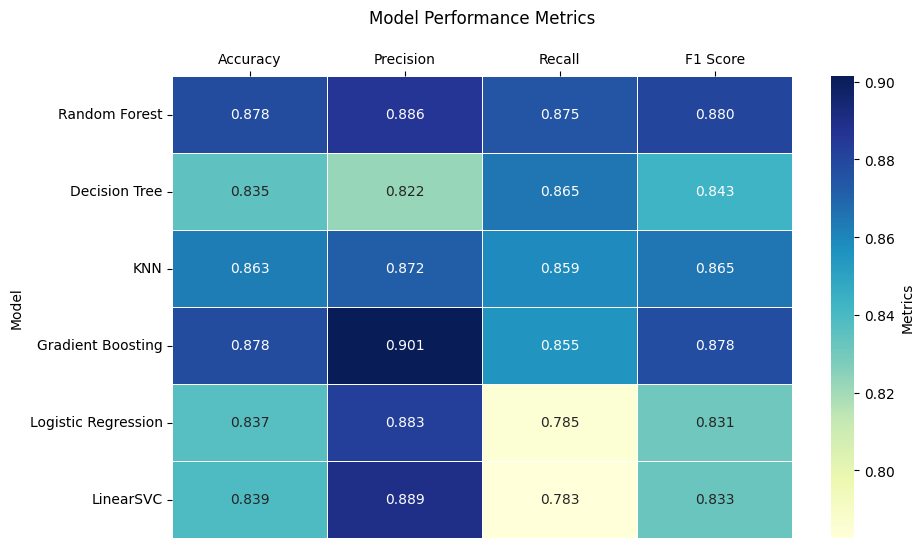

In [ ]:
# Create a dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Function to evaluate a model and add results to the dictionary
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

    # Print confusion matrix
    print(f"Confusion Matrix for {model_name}:\n")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*40 + "\n")

# Evaluate each model
models = {
    'LinearSVC': svc,
    'KNN': knn,
    'Logistic Regression': logit,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gbc
}

for model_name, model in models.items():
    evaluate_model(model, model_name, x_train, x_test, y_train, y_test)

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results)

# Sort the DataFrame by Recall in descending order
results_df = results_df.sort_values(by='Recall', ascending=False)

# Create a heatmap with x-axis labels above the chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(results_df.set_index('Model'), annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5, ax=ax, cbar_kws={'label': 'Metrics'})
ax.xaxis.tick_top()  # Move x-axis ticks to the top
plt.title('Model Performance Metrics\n')
plt.show()

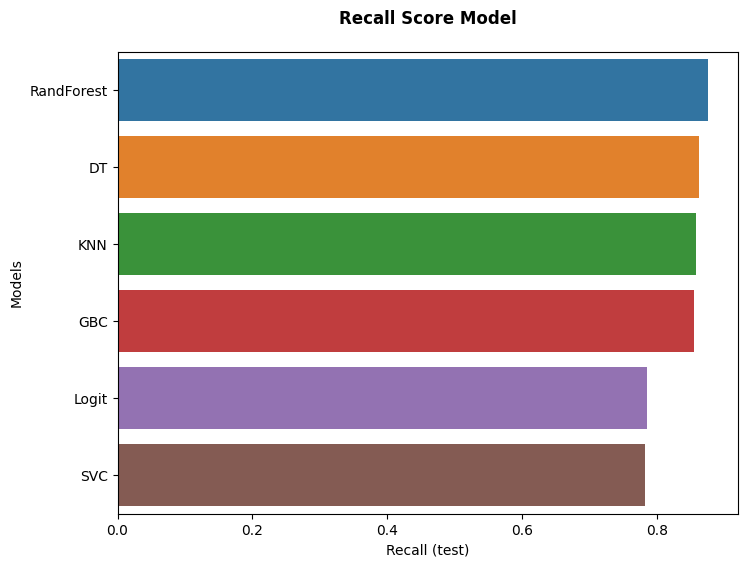

In [ ]:
# Visualisasi Recall models
plt.figure(figsize=(8, 6))
model_eval_sorted = model_eval.sort_values(by='Recall (test)', ascending=False)
sns.barplot(model_eval_sorted, x='Recall (test)', y='Models', orient='h')
plt.title('Recall Score Model', weight='bold', pad=20)
plt.show()

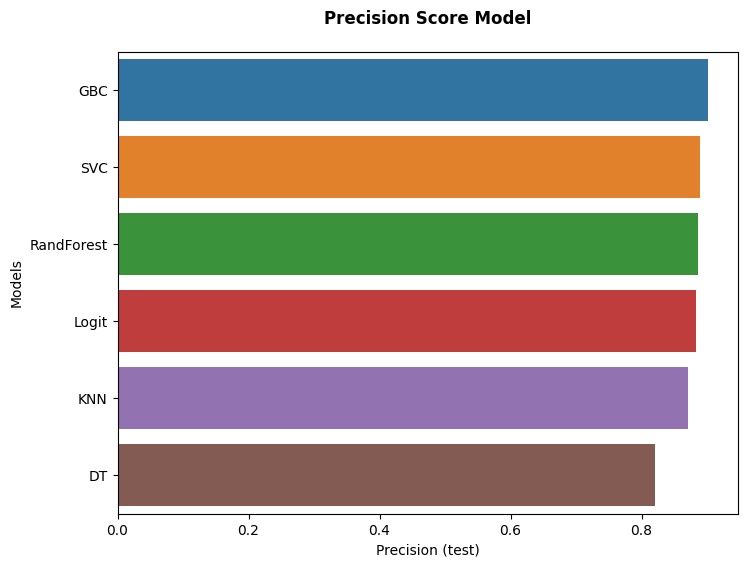

In [ ]:
# Visualisasi precision models
plt.figure(figsize=(8, 6))
model_eval_sorted = model_eval.sort_values(by='Precision (test)', ascending=False)
sns.barplot(model_eval_sorted, x='Precision (test)', y='Models', orient='h')
plt.title('Precision Score Model', weight='bold', pad=20)
plt.show()

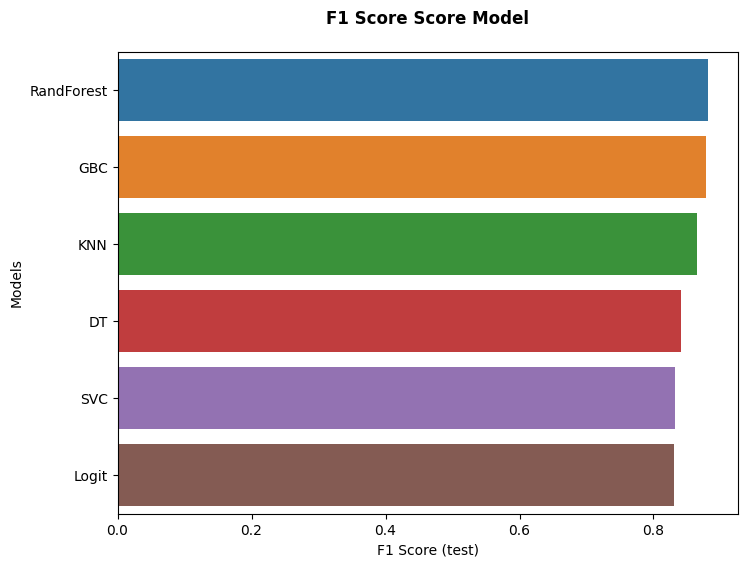

In [ ]:
# Visualisasi f1-score models
plt.figure(figsize=(8, 6))
model_eval_sorted = model_eval.sort_values(by='F1 Score (test)', ascending=False)
sns.barplot(model_eval_sorted, x='F1 Score (test)', y='Models', orient='h')
plt.title('F1 Score Score Model', weight='bold', pad=20)
plt.show()

## Model Evaluation

In [ ]:
# Daftar model yang ingin dibandingkan
models = [knn, svc, logit, dt, rf, gbc]

# Daftar nama model untuk tampilan
model_names = ["K-Nearest Neighbors", "LinearSVC", "Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

# Inisialisasi daftar untuk menyimpan hasil evaluasi
results = []

# Fungsi untuk mengevaluasi model dan mencetak hasilnya
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    train_recall = recall_score(y_train, train_pred)
    test_pred = model.predict(x_test)
    test_recall = recall_score(y_test, test_pred)
    return train_recall, test_recall

# Lakukan loop untuk model dan tampilkan hasilnya
for i, model in enumerate(models):
    train_recall, test_recall = evaluate_model(model, x_train, y_train, x_test, y_test)
    if train_recall > test_recall:
        result = f"{model_names[i]}: Model overfitting"
    elif train_recall < test_recall:
        result = f"{model_names[i]}: Model underfitting"
    else:
        result = f"{model_names[i]}: Model best-fit"
    results.append((model_names[i], result, train_recall, test_recall))

# Tampilkan hasil evaluasi
for model_name, result, train_recall, test_recall in results:
    print(f"{result} (Train recall: {train_recall:.2f}, Test recall: {test_recall:.2f})")

K-Nearest Neighbors: Model overfitting (Train recall: 0.89, Test recall: 0.86)
LinearSVC: Model underfitting (Train recall: 0.78, Test recall: 0.78)
Logistic Regression: Model underfitting (Train recall: 0.78, Test recall: 0.79)
Decision Tree: Model overfitting (Train recall: 1.00, Test recall: 0.86)
Random Forest: Model overfitting (Train recall: 1.00, Test recall: 0.87)
Gradient Boosting: Model underfitting (Train recall: 0.85, Test recall: 0.86)


**Observasi:**

1. **K-Nearest Neighbors (KNN)**: Model ini cenderung overfitting. Hal ini terlihat dari tingkat recall pada data pelatihan yang tinggi (89%) dibandingkan dengan tingkat recall pada data uji (86%).

2. **LinearSVC dan Logistic Regression**: Model ini menunjukkan underfitting. Kedua tingkat recall pada data pelatihan dan data uji relatif rendah. Model ini mungkin terlalu sederhana untuk dataset yang digunakan.

3. **Decision Tree**: Model ini adalah contoh overfitting yang tinggi. Tingkat recall pada data pelatihan mencapai 100%, sementara pada data uji hanya sekitar 86%.

4. **Random Forest**: Model ini juga overfitting. Tingkat recall pada data pelatihan mencapai 100%, dan pada data uji sekitar 88%. Dengan selisih yang sedikit lebih kecil menunjukkan bahwa model ini lebih baik daripada Decision Tree, tetapi masih mengalami masalah overfitting.

5. **Gradient Boosting**: Model ini cenderung underfitting, dengan tingkat recall pada data uji 86% dan data pelatihan 85%.

Pemilihan **Random Forest** sebagai model pilihan adalah karena meskipun model ini juga overfitting, tingkat recall pada data uji adalah yang tertinggi di antara model-model yang diuji (sekitar 88%). Meskipun overfitting, model ini memberikan hasil yang relatif baik dalam memprediksi data baru dibandingkan dengan model lainnya. Namun, perlu dilakukan lebih banyak eksperimen dan fine-tuning untuk mengatasi masalah overfitting.

In [ ]:
# Create a list of models
models = [
    ("Logistic Regression", logit),
    ("K-Nearest Neighbors", knn),
    ("LinearSVC", svc),
    ("Decision Tree", dt),
    ("Random Forest", rf),
    ("Gradient Boosting", gbc)
]

# Perform 5-fold cross-validation for each model
for model_name, model in models:
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='recall')

    # Calculate the mean recall of the model using cross-validation
    mean_recall = cv_scores.mean()

    # Set a threshold to determine if the model is the best fit or not
    threshold = 0.85

    if mean_recall >= threshold:
        print(f"{model_name} is a best fit model with Mean recall: {100 * mean_recall:.2f}%")
    else:
        print(f"{model_name} is not the best fit model with Mean recall: {100 * mean_recall:.2f}%")


Logistic Regression is not the best fit model with Mean recall: 78.11%
K-Nearest Neighbors is not the best fit model with Mean recall: 83.98%
LinearSVC is not the best fit model with Mean recall: 77.72%
Decision Tree is not the best fit model with Mean recall: 83.42%
Random Forest is a best fit model with Mean recall: 85.65%
Gradient Boosting is not the best fit model with Mean recall: 84.06%


In [ ]:
# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier(random_state=0)

# Melakukan cross-validation dan menghitung skor
score = cross_val_score(rf_classifier, x_train, y_train, cv=5, scoring='recall')

print(f'scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

scores for each fold are: [0.86158886 0.84930385 0.85913186 0.85737705 0.85831286]
Average score: 0.86


### **Kesimpulan Pengambilan Model**

Berdasarkan percobaan pemodelan tersebut, dapat disimpulkan bahwa model yang akan digunakan untuk memprediksi churn pelanggan adalah **Random Forest Classifier**. Ini disarankan atas dasar beberapa alasan:
1.	**Tujuan Model Metric**: Untuk memprediksi churn pelanggan, diperlukan tingkat recall yang tinggi. Random Forest Classifier memiliki kinerja yang baik dalam hal ini.
2.	**Waktu Komputasi**: Dibandingkan dengan Gradien Boosting Classifier yang juga memiliki akurasi yang baik, pengaturan parameter (hypermarameter tuning) untuk Random Forest Classifier lebih cepat dan efisien. Ini dapat menghemat waktu dan sumber daya.
3.	**Non-Asumsional**: Random Forest Classifier tidak bergantung pada asumsi bahwa data harus berdistribusi normal, yang sesuai dengan karakteristik dataset yang tidak mengikuti distribusi normal.
Dengan demikian, Random Forest Classifier adalah pilihan yang baik untuk memprediksi churn pelanggan dalam konteks ini.


## Hyperparameter Tuning

**Random Forest**

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Random Forest Model:")
print(best_rf)
print("\nBest Parameters:")
print(best_params)
print("\nBest Recall Score:")
print(best_score)


Best Random Forest Model:
RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=50, random_state=0)

Best Parameters:
{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}

Best Recall Score:
0.8535399632120944


In [ ]:
rf_model2 = best_rf.fit(x_train, y_train)

# Evaluasi model
eval_classification(rf_model2)

Accuracy (Test Set): 0.88
Accuracy (Train set): 0.90

Precision (Test Set): 0.90
Precision (Train Set): 0.93

Recall (Test Set): 0.87
Recall (Train Set): 0.88

F1-Score (Test Set): 0.88
F1-Score (Train Set): 0.90


**Observasi :**

* Berdasarkan hasil tuning parameter menggunakan GridSearchCV tersebut, didapatkan bahwa best model atau model terbaik random forest menggunakan parameter max_depth (kedalaman maksimum), max_feature (jumlah fitur maksimum), min_sample_leaf (jumlah daun minimum), min_samples_split (pembagian minimum), dan n_estimators (jumlah pohon keputusan) masing-masingnya adalah 10, auto, 2, 10, dan 50 untuk mendapatkan score recall terbaik.

* Model tersebut memiliki kinerja yang baik dengan nilai recall yang tinggi, hal tersebut menunjukkan bahwa model mampu mengidentifikasi sebagian besar positif sejati, dalam hal ini adalah masalah prediksi customer churn di bank.

* Pada model tersebut, perbedaan antara skor data pelatihan dan data uji tidaklah terlalu besar, sehingga mengindikasikan bahwa model tersebut tidak terlalu disesuaikan dengan data pelatihan atau dengan kata lain memiliki kemampuan untuk memprediksi data yang baru.

## Business Simulation

Menggunakan data mentah untuk memprediksi kostumer churn atau tidak

In [ ]:
df2 = pd.read_csv('/content/Churn_Modelling.csv')

df2 = pd.get_dummies(df2, columns=['Geography', 'Gender'], prefix=['Geo', 'Is'])

In [ ]:
# Membagi variabel independen dan terikat
x_real = df2.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'HasCrCard', 'EstimatedSalary', 'Tenure', 'Exited'])
y_real = df2['Exited']

In [ ]:
y_pred = rf_model2.predict(x_real)

# Evaluate the model
accuracy = accuracy_score(y_real, y_pred)
conf_matrix = confusion_matrix(y_real, y_pred)
class_report = classification_report(y_real, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.3376
Confusion Matrix:
[[1823 6140]
 [ 484 1553]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.23      0.36      7963
           1       0.20      0.76      0.32      2037

    accuracy                           0.34     10000
   macro avg       0.50      0.50      0.34     10000
weighted avg       0.67      0.34      0.35     10000



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


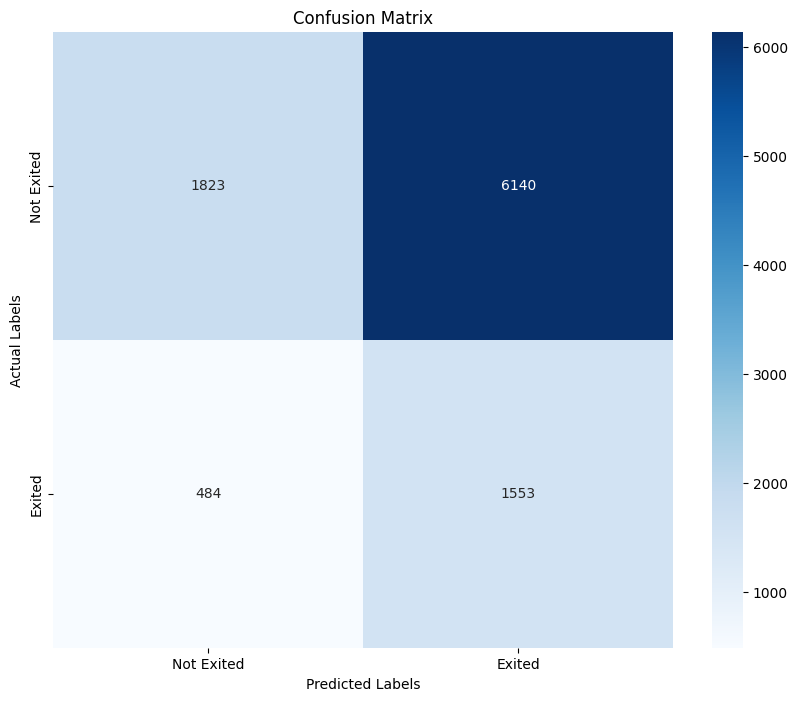

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


In [ ]:
# churn rate after model
churn_rate = (484/10000) * 100
churn_rate

4.84

## Feature Importance

In [ ]:
feature_importances = rf_model2.feature_importances_

# Pair feature names with their importances
feature_names = X_resampled.columns.tolist()
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")

Age: 0.2529
NumOfProducts: 0.1326
IsActiveMember: 0.1211
Is_Male: 0.0967
Is_Female: 0.0955
Balance: 0.0827
Geo_France: 0.0740
Geo_Spain: 0.0601
CreditScore: 0.0491
Geo_Germany: 0.0352


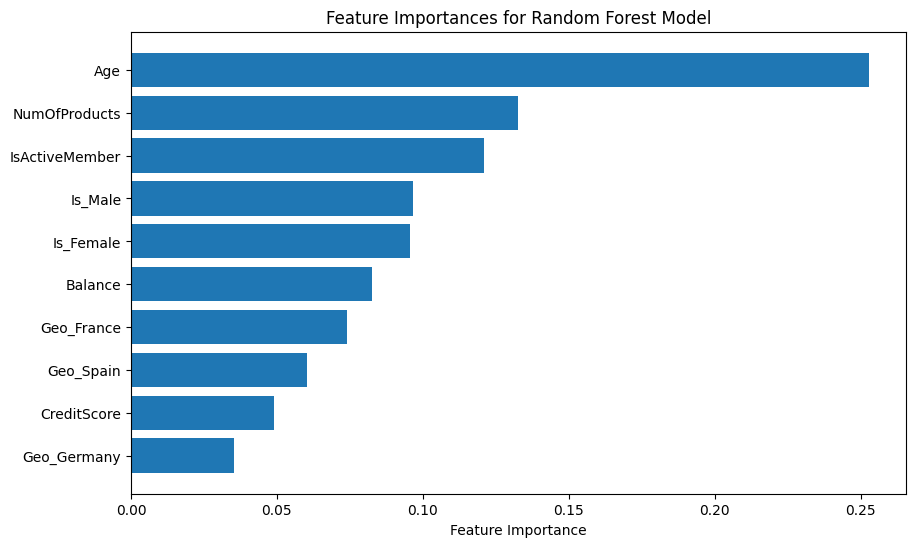

In [ ]:
# Extract feature names and their importances
feature_names = [feature for feature, importance in sorted_feature_importance]
feature_importances = [importance for feature, importance in sorted_feature_importance]

# Reverse the lists to have the highest importance at the top
feature_names = feature_names[::-1]
feature_importances = feature_importances[::-1]

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Random Forest Model')
plt.show()

Korelasi paling tinggi adalah age yakni 0.2529. Korelasi positif ini menunjukkan bahwa semakin tua usia pelanggan, semakin tinggi kemungkinan mereka akan keluar dari layanan atau produk. Maka dari itu diperlukan adanya fokus pada pelanggan yang usia lebih tua untuk mengurangi tingkat churn.

**Top 3 Feature Importance**

Berdasarkan Feature Importance Random Forest, didapatkan bahwa :
1. Feauture paling penting adalah **Age** yakni sekitar 0.2529. Hal ini menunjukkan bahwa **usia customer memiliki pengaruh besar** terhadap keputusan mereka untuk tetap atau keluar.
2. **NumofProduct** memiliki feature importance sekitar 0.1326. Hal ini menunjukkan bahwa customer yang **menggunakan lebih banyak produk** mungkin lebih **cenderung untuk tetap menjadi nasabah.**
3. **IsActiveMember** memiliki feature importance 0.1211. Hal ini menunjukkan bahwa bagi member atau **customer yang aktif** **memiliki pengaruh** yang besar bagi bank.



### Business insight Feature Importance

**Rekomendasi:**

1. Pertahankan Fokus pada Segment Usia:   
Sesuaikan **strategi retensi berdasarkan** segmentasi **usia atau life stages financial**. early life (15-30),  mid life (31-50), pra pensiun (51-60), pensiun (60+). Menawarkan produk atau program yang sesuai kebutuhan usia, seperti menawarkan program pensiun untuk customer yang lebih tua.
2. Optimalkan Penawaran Produk:   
Diutamakan untuk customer yang hanya menggunakan satu jenis produk. **Menawarkan paket produk** yang menarik **dengan keuntungan tambahan** untuk customer yang memiliki lebih dari satu produk. Misal, memberikan diskon/cashback pada customer yang memiliki 2 produk sekaligus.
3. Meningkatkan Komunikasi dengan Customer:   
Diutamakan untuk customer yang kurang aktif/tidak aktif. **Berkomunikasi melalui berbagai saluran**, seperti email atau pesan langung ke nomor telepon untuk **menjelaskan nilai tambah** jika mereka aktif dalam menggunakan layanan bank.


# **Terima Kasih**